## Data Exploration

1. Import Required Libraries and Load the Dataset


In [3]:
try:
    import ucimlrepo
except ImportError:
    !pip install ucimlrepo

## Import libraries

import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder


In [4]:


# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets
# Combine features (X) and target (y) into one DataFrame
df = X.copy()
df['y'] = y


# variable information
print(bank_marketing.variables.to_string())


           name     role         type      demographic                                                                                                                                                                                                                                                                                                                                                                                                           description  units missing_values
0           age  Feature      Integer              Age                                                                                                                                                                                                                                                                                                                                                                                                                  None   None             no
1           job  Feature  Categori

In [28]:
# Inspect dataset
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify column types
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")


Features shape: (45211, 16)
Target shape: (45211, 1)
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical columns: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


In [23]:
# Display dataset sample
display(df.head())


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


##Missing Value Identification##

In [24]:


##checking missing value percentages
def missing_values_summarizer(df):
    mis_val = df.isna().sum()
    mis_val_percentage = 100 * mis_val / len(df)
    mis_val_table = pd.DataFrame({'Missing values': mis_val, 'Percentage': mis_val_percentage})
    return mis_val_table.sort_values(by='Percentage', ascending=False)

missing_summary = missing_values_summarizer(X)
display(missing_summary)


,Missing values,Percentage
poutcome,36959,81.747805
contact,13020,28.798301
education,1857,4.107407
job,288,0.637013
age,0,0.000000
marital,0,0.000000
default,0,0.000000
balance,0,0.000000
housing,0,0.000000
loan,0,0.000000


from matplotlib import pyplot as plt
missing_summary['Missing values'].plot(kind='hist', bins=20, title='Missing values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_summary['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_summary.plot(kind='scatter', x='Missing values', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_summary['Missing values'].plot(kind='line', figsize=(8, 4), title='Missing values')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
missing_summary['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [29]:
def find_missing_value_patterns(df, column):
    missing_rows = df[df[column].isna()]
    print(f"Missing value patterns for column '{column}':")
    return missing_rows.describe(include='all')

for column in missing_summary.index:
    if missing_summary.loc[column, 'Percentage'] > 0:
        pattern = find_missing_value_patterns(X, column)
        display(pattern)


Missing value patterns for column 'poutcome':


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,36959.000000,36704,36959,35425,36959,36959.000000,36959,36959,24009,36959.000000,36959,36959.000000,36959.000000,36959.000000,36959.000000,0
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,0
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,NaN
freq,NaN,8115,22472,18951,36201,NaN,19990,30836,21734,NaN,11252,NaN,NaN,NaN,NaN,NaN
mean,40.932114,NaN,NaN,NaN,NaN,1318.722043,NaN,NaN,NaN,16.145621,NaN,257.738332,2.921886,-0.962039,0.000460,NaN
std,10.430504,NaN,NaN,NaN,NaN,3039.386767,NaN,NaN,NaN,8.372530,NaN,262.266179,3.325601,3.778887,0.047388,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,9.000000,NaN,101.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,414.000000,NaN,NaN,NaN,17.000000,NaN,177.000000,2.000000,-1.000000,0.000000,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1358.000000,NaN,NaN,NaN,22.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


Missing value patterns for column 'contact':


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,13020.000000,12909,13020,12343,13020,13020.000000,13020,13020,0,13020.000000,13020,13020.000000,13020.000000,13020.000000,13020.000000,70
unique,NaN,11,3,3,2,NaN,2,2,0,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,3965,8031,7149,12731,NaN,9357,10988,NaN,NaN,7975,NaN,NaN,NaN,NaN,31
mean,40.600077,NaN,NaN,NaN,NaN,1183.550384,NaN,NaN,NaN,15.360138,NaN,252.340476,2.787481,1.299386,0.021966,NaN
std,9.439221,NaN,NaN,NaN,NaN,2638.647690,NaN,NaN,NaN,8.454077,NaN,258.405545,3.371954,36.451647,0.502526,NaN
min,20.000000,NaN,NaN,NaN,NaN,-3372.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,8.000000,NaN,101.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,389.000000,NaN,NaN,NaN,15.000000,NaN,178.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1255.250000,NaN,NaN,NaN,21.000000,NaN,311.000000,3.000000,-1.000000,0.000000,NaN


Missing value patterns for column 'education':


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,1857.000000,1730,1857,0,1857,1857.000000,1857,1857,1180,1857.000000,1857,1857.000000,1857.000000,1857.000000,1857.000000,323
unique,NaN,11,3,0,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,NaN,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,454,1160,NaN,1825,NaN,1037,1724,990,NaN,556,NaN,NaN,NaN,NaN,177
mean,44.510501,NaN,NaN,NaN,NaN,1526.754443,NaN,NaN,NaN,15.810985,NaN,257.313947,2.849219,36.856220,0.488422,NaN
std,12.196400,NaN,NaN,NaN,NaN,3152.228273,NaN,NaN,NaN,8.689590,NaN,245.622775,3.778611,95.226077,1.569167,NaN
min,18.000000,NaN,NaN,NaN,NaN,-1445.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN
25%,36.000000,NaN,NaN,NaN,NaN,106.000000,NaN,NaN,NaN,8.000000,NaN,99.000000,1.000000,-1.000000,0.000000,NaN
50%,45.000000,NaN,NaN,NaN,NaN,568.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,53.000000,NaN,NaN,NaN,NaN,1699.000000,NaN,NaN,NaN,22.000000,NaN,332.000000,3.000000,-1.000000,0.000000,NaN


Missing value patterns for column 'job':


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,288.000000,0,288,161,288,288.000000,288,288,177,288.000000,288,288.000000,288.000000,288.000000,288.000000,33
unique,NaN,0,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,NaN,married,secondary,no,NaN,no,no,cellular,NaN,jun,NaN,NaN,NaN,NaN,failure
freq,NaN,NaN,203,71,286,NaN,262,284,131,NaN,90,NaN,NaN,NaN,NaN,20
mean,47.593750,NaN,NaN,NaN,NaN,1772.357639,NaN,NaN,NaN,14.642361,NaN,237.611111,3.309028,20.982639,0.319444,NaN
std,10.775095,NaN,NaN,NaN,NaN,2970.288559,NaN,NaN,NaN,8.630261,NaN,226.115296,3.788621,75.652767,1.089403,NaN
min,25.000000,NaN,NaN,NaN,NaN,-295.000000,NaN,NaN,NaN,1.000000,NaN,8.000000,1.000000,-1.000000,0.000000,NaN
25%,41.000000,NaN,NaN,NaN,NaN,170.750000,NaN,NaN,NaN,6.000000,NaN,87.750000,1.000000,-1.000000,0.000000,NaN
50%,47.000000,NaN,NaN,NaN,NaN,677.000000,NaN,NaN,NaN,14.000000,NaN,165.000000,2.000000,-1.000000,0.000000,NaN
75%,55.000000,NaN,NaN,NaN,NaN,2165.500000,NaN,NaN,NaN,20.250000,NaN,311.000000,4.000000,-1.000000,0.000000,NaN


#Categorical variable Exploration#



##1.Categorical Distribution

In [30]:
def plot_categorical_distribution(data,column):

    if column not in data.columns:
      print(f"column does not exist in the data set")
      return

    #count values
    counts=data[column].value_counts(dropna=False)
    print(f"Distribution of {column}:\n",counts)

    #plot
    plt.figure(figsize=(10,8))
    sns.countplot(data=data,y=column,order=counts.index,palette="pastel")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.title(f"Distribution of {column}")
    plt.show()



Processing 7/9: job
Distribution of job:
 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


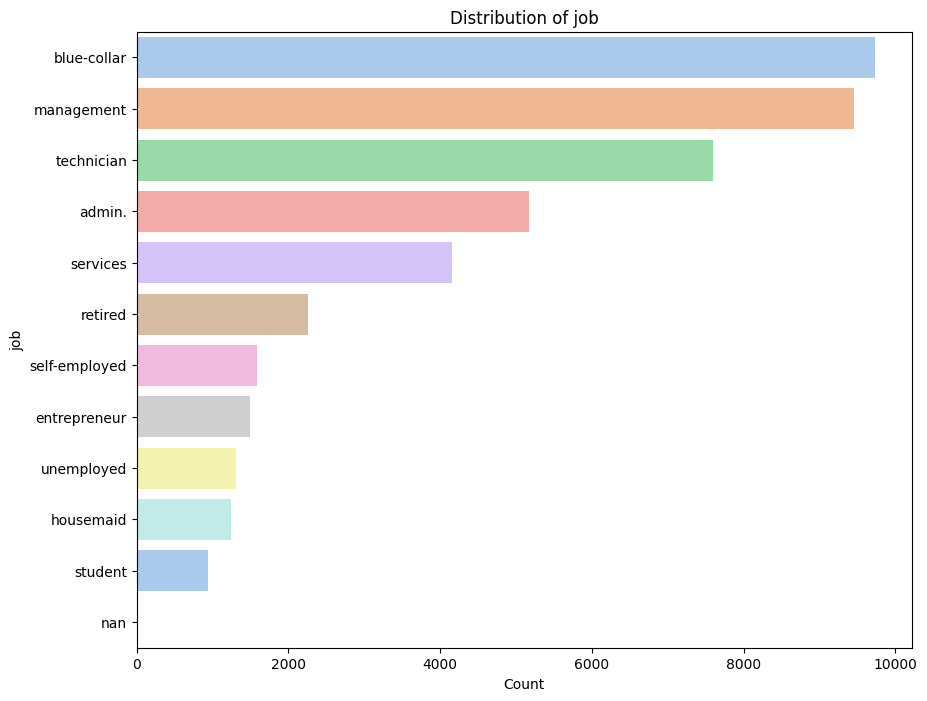

Processing 7/9: marital
Distribution of marital:
 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


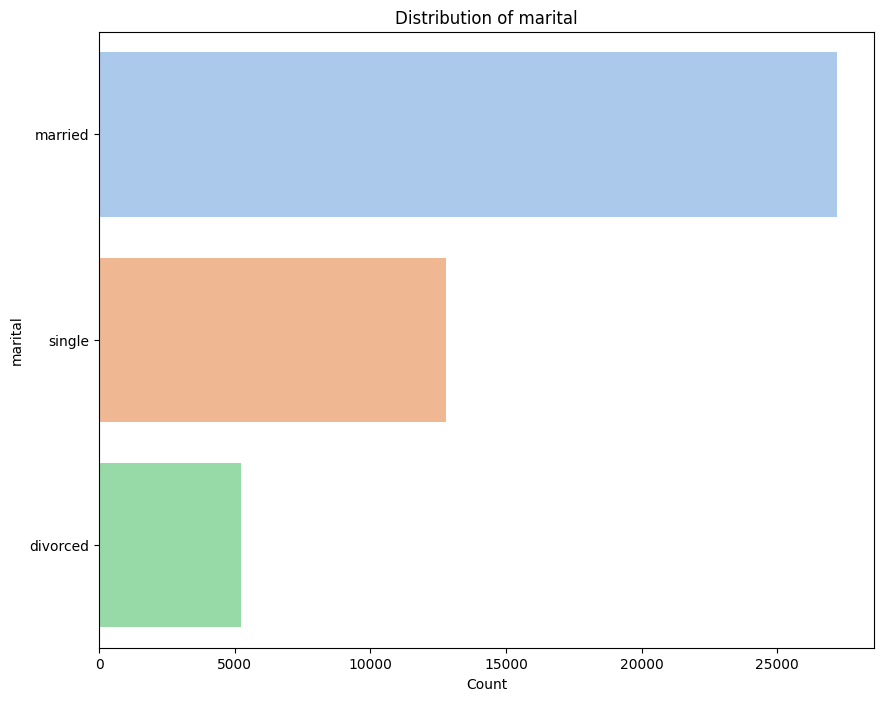

Processing 7/9: education
Distribution of education:
 education
secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


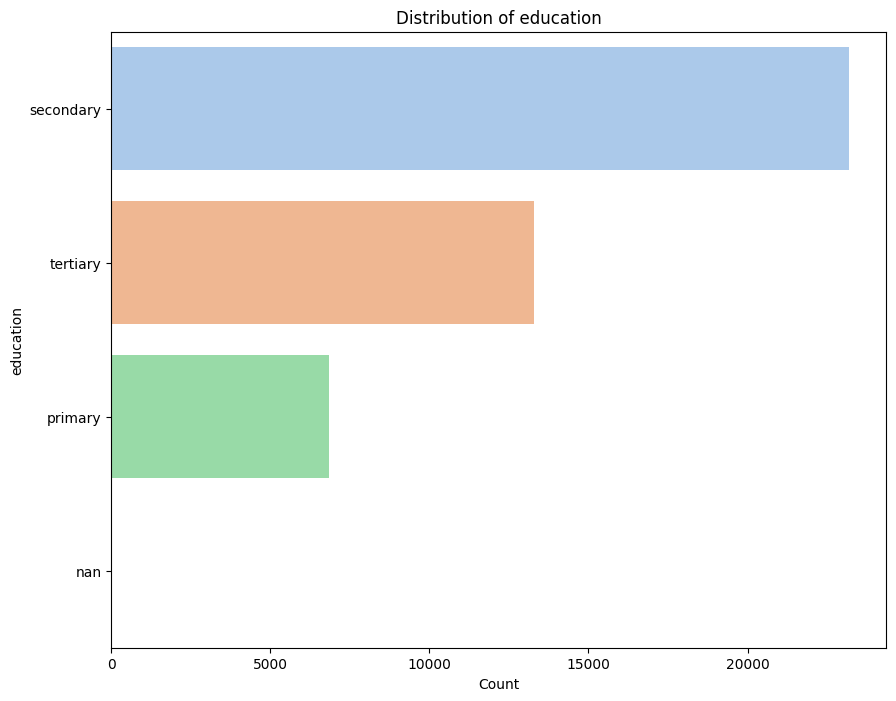

Processing 7/9: default
Distribution of default:
 default
no     44396
yes      815
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


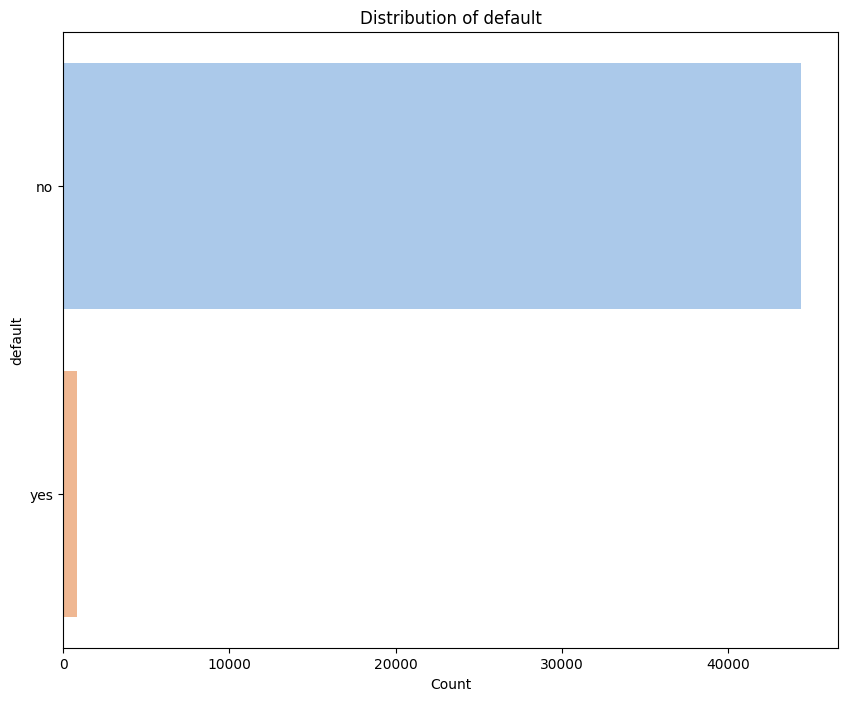

Processing 7/9: housing
Distribution of housing:
 housing
yes    25130
no     20081
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


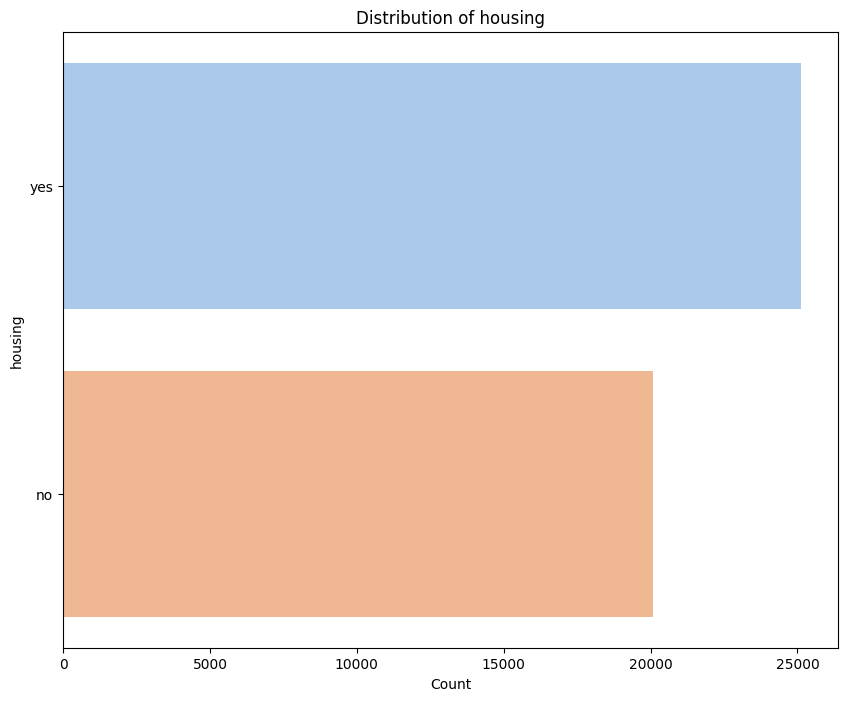

Processing 7/9: loan
Distribution of loan:
 loan
no     37967
yes     7244
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


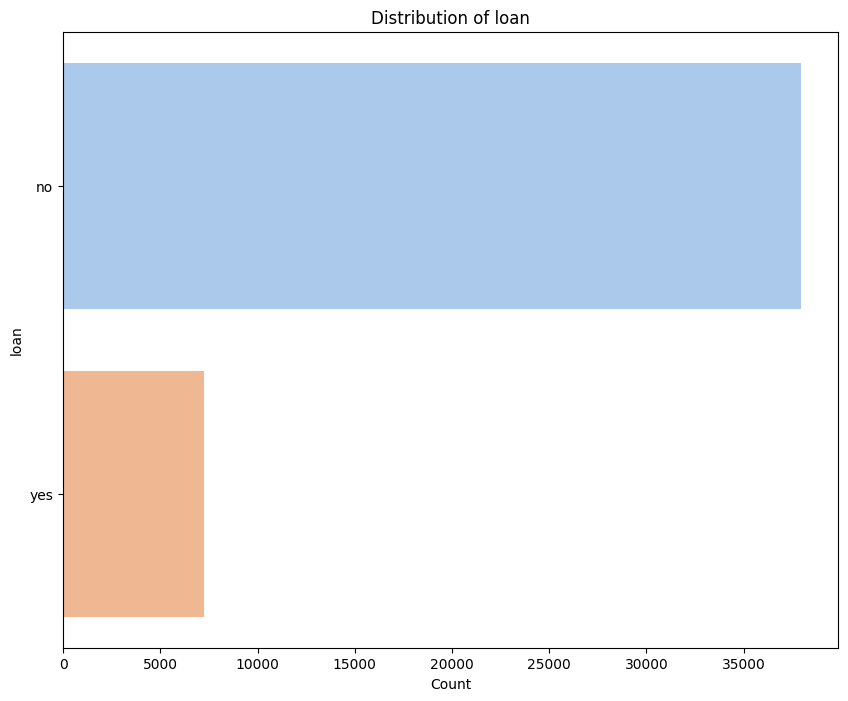

Processing 7/9: contact
Distribution of contact:
 contact
cellular     29285
NaN          13020
telephone     2906
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


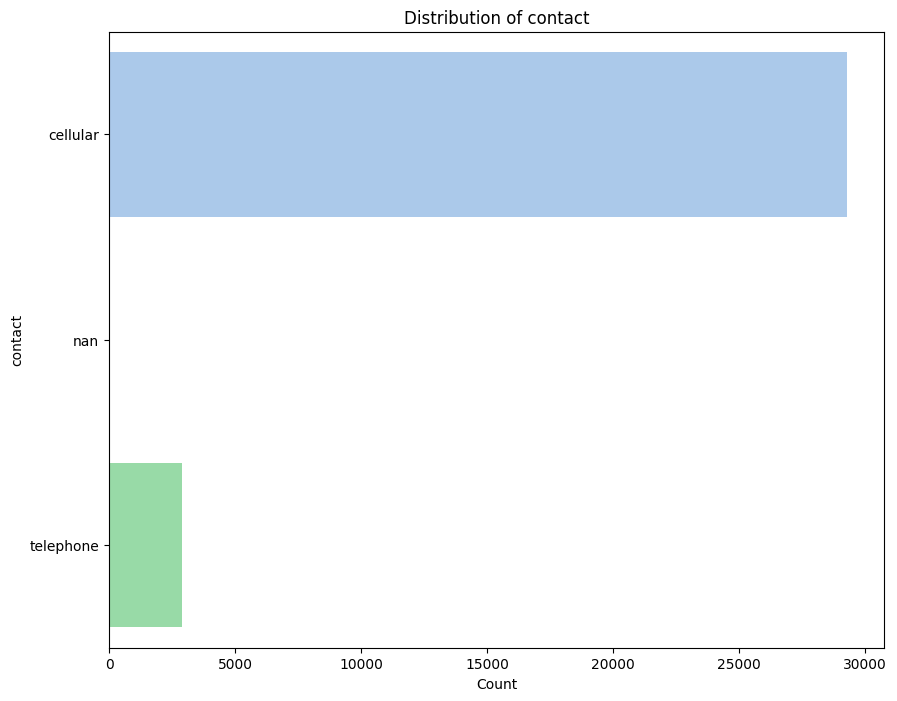

Processing 7/9: month
Distribution of month:
 month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


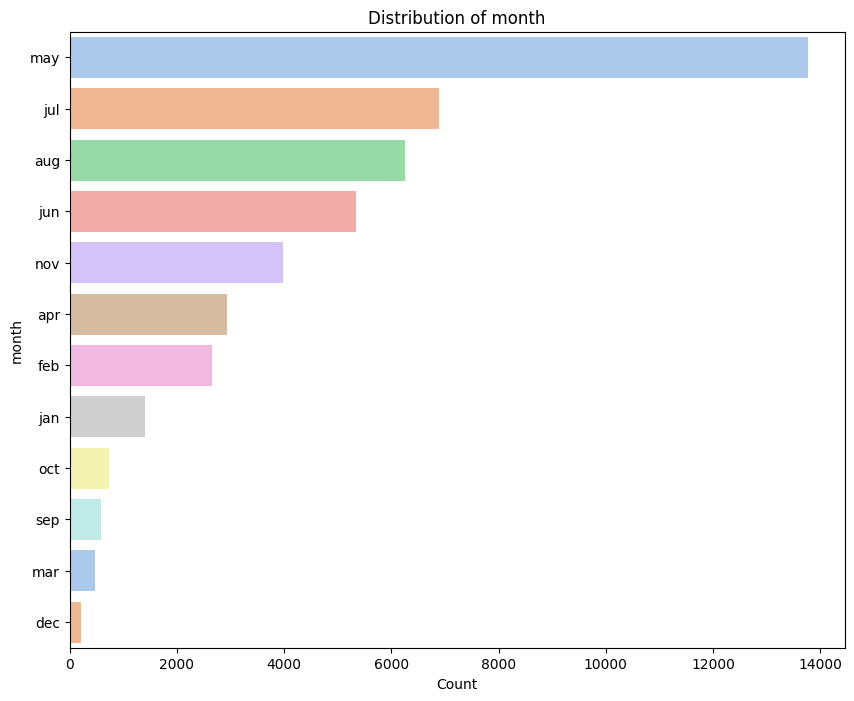

Processing 7/9: poutcome
Distribution of poutcome:
 poutcome
NaN        36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


<ipython-input-30-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


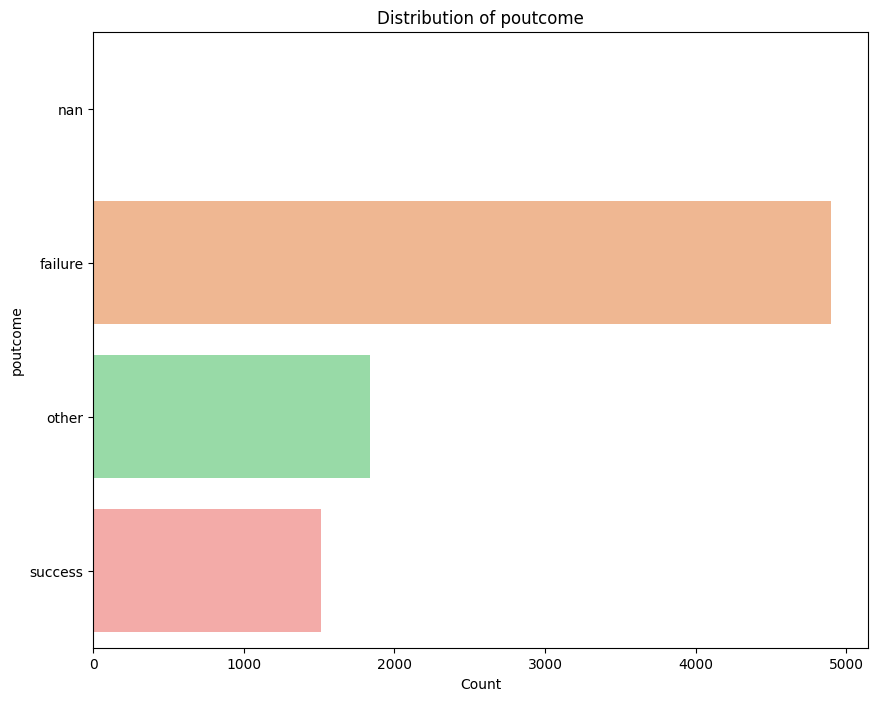

In [31]:



for column in categorical_columns:
   print(f"Processing {i}/{len(categorical_columns)}: {column}")
   plot_categorical_distribution(X, column)


##2.Identify Rare Categories

In [33]:
def identify_rare_categories(data, column, threshold=0.01):
    """
      Identifies rare categories in a categorical variable

      parameters:
       data: The dataset
       column: The categorical column
       threshold: The threshold for rare category

  """
  ##column existence checking
    if column not in data.columns:
        print(f"Column '{column}' does not exist in the dataset")
        return

    category_frequency = data[column].value_counts(normalize=True, dropna=False)
    rare_categories = category_frequency[category_frequency < threshold]
    print(f"Rare categories in '{column}':")
    return rare_categories


In [37]:
rare_categories_summary = {column: identify_rare_categories(X, column) for column in categorical_columns}
display(rare_categories_summary)


Rare categories in 'job':
Rare categories in 'marital':
Rare categories in 'education':
Rare categories in 'default':
Rare categories in 'housing':
Rare categories in 'loan':
Rare categories in 'contact':
Rare categories in 'month':
Rare categories in 'poutcome':


{'job': job
 NaN    0.00637
 Name: proportion, dtype: float64,
 'marital': Series([], Name: proportion, dtype: float64),
 'education': Series([], Name: proportion, dtype: float64),
 'default': Series([], Name: proportion, dtype: float64),
 'housing': Series([], Name: proportion, dtype: float64),
 'loan': Series([], Name: proportion, dtype: float64),
 'contact': Series([], Name: proportion, dtype: float64),
 'month': month
 dec    0.004733
 Name: proportion, dtype: float64,
 'poutcome': Series([], Name: proportion, dtype: float64)}

##3.Relationship with target variable

In [13]:
def plot_relation_with_target(data, column, target, save_plot=False, output_dir="./plots"):
    """
    Analyzes and visualizes the relationship between a categorical variable and the target variable.

    Parameters:
        data: The dataset
        column: The categorical column
        target: The target column
        save_plot: If True, saves the plot to a file.
        output_dir: Directory to save plots if save_plot is True.
    """
    # Check column existence
    if column not in data.columns or target not in data.columns:
        print(f"Column '{column}' or '{target}' does not exist in the dataset")
        return

    # Cross-tabulation
    crosstab = pd.crosstab(data[column], data[target], normalize='index', dropna=False)
    print(f"Cross-tabulation of '{column}' and '{target}':\n", crosstab)

    # Plot
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 8))
    plt.title(f"Relationship between {column} and {target}")
    plt.xlabel(column)
    plt.ylabel("Proportion")
    plt.legend(title=target, loc='upper right')

    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f"{output_dir}/{column}_vs_{target}.png", bbox_inches='tight')

    plt.show()


Processing 1/9: job
Cross-tabulation of 'job' and 'y':
 y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
NaN            0.881944  0.118056


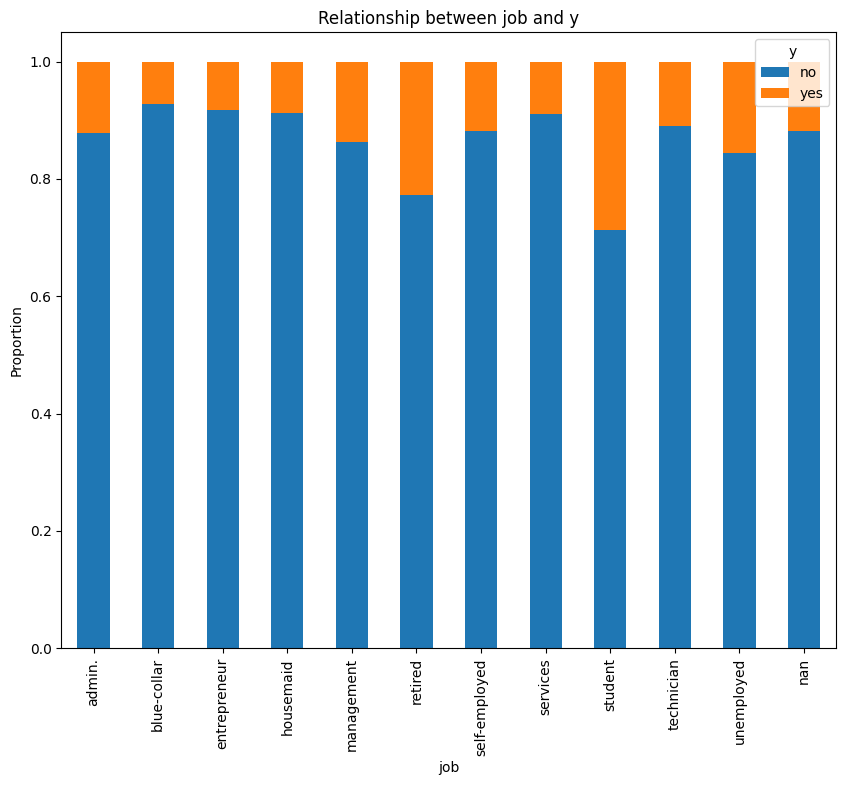

Processing 2/9: marital
Cross-tabulation of 'marital' and 'y':
 y               no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492


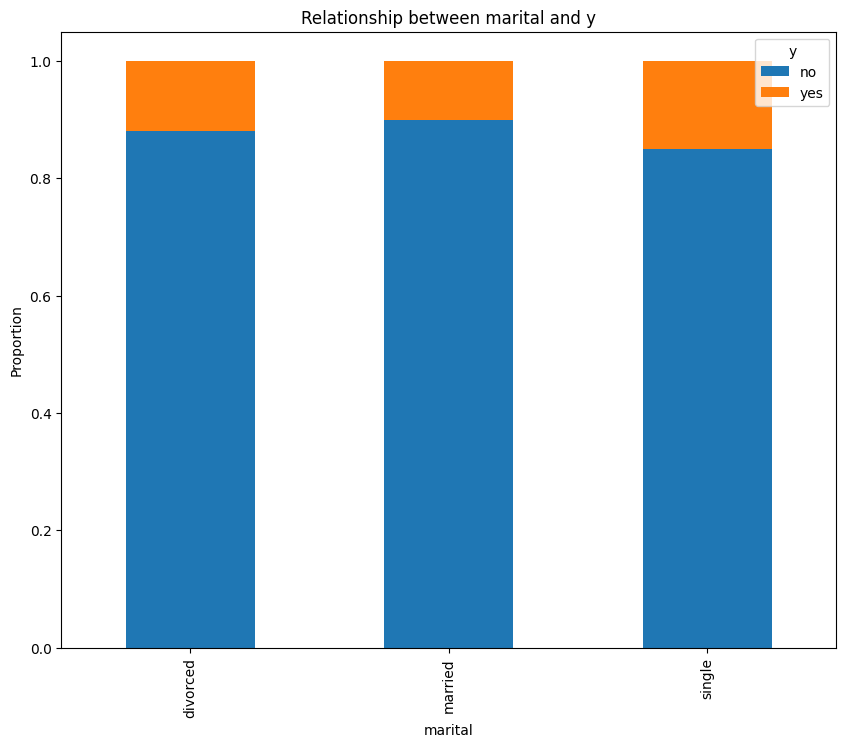

Processing 3/9: education
Cross-tabulation of 'education' and 'y':
 y                no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
NaN        0.864297  0.135703


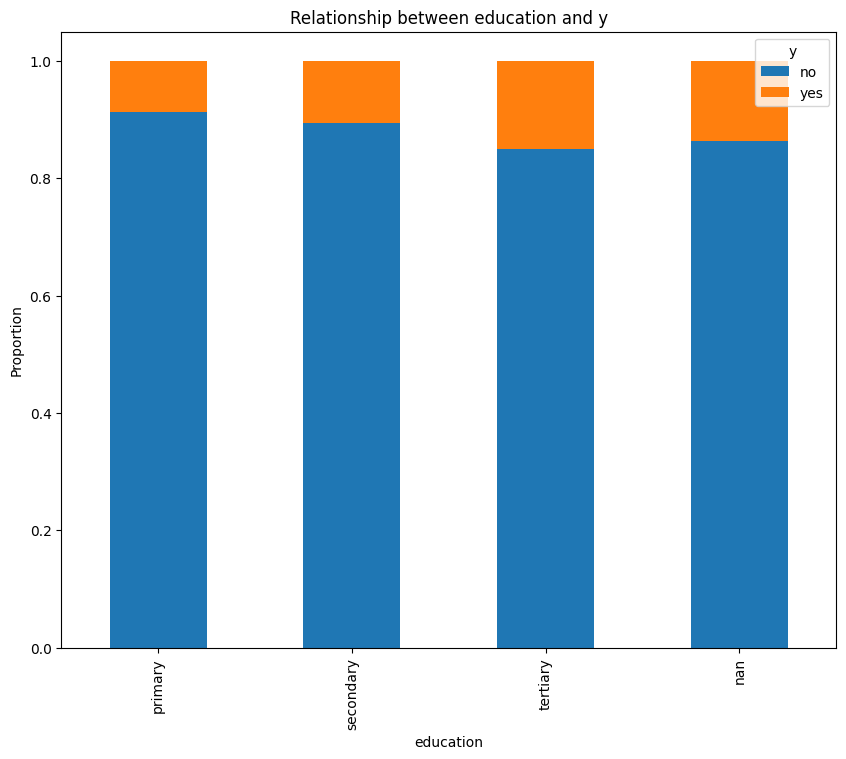

Processing 4/9: default
Cross-tabulation of 'default' and 'y':
 y              no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804


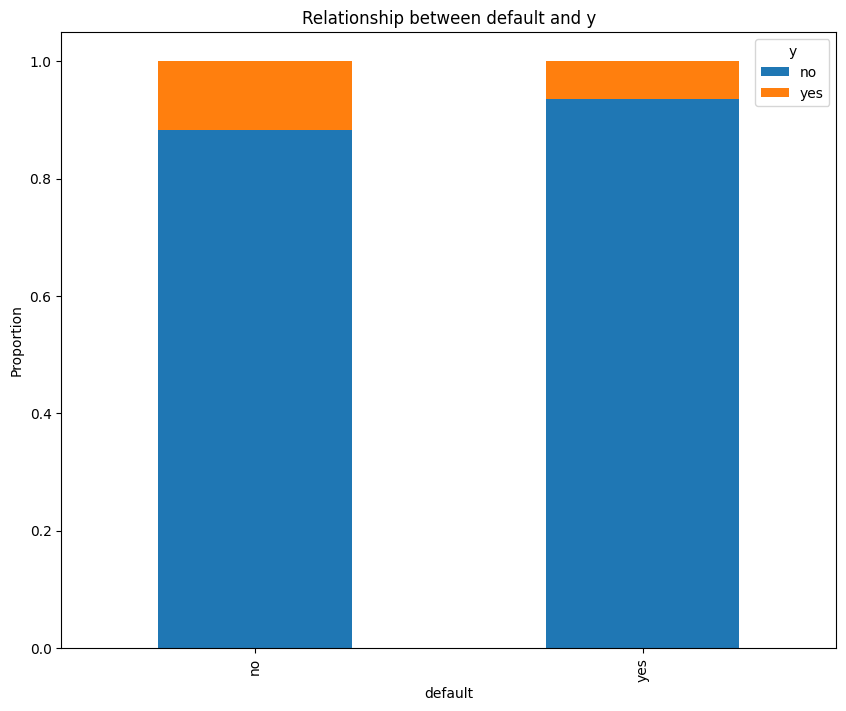

Processing 5/9: housing
Cross-tabulation of 'housing' and 'y':
 y              no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000


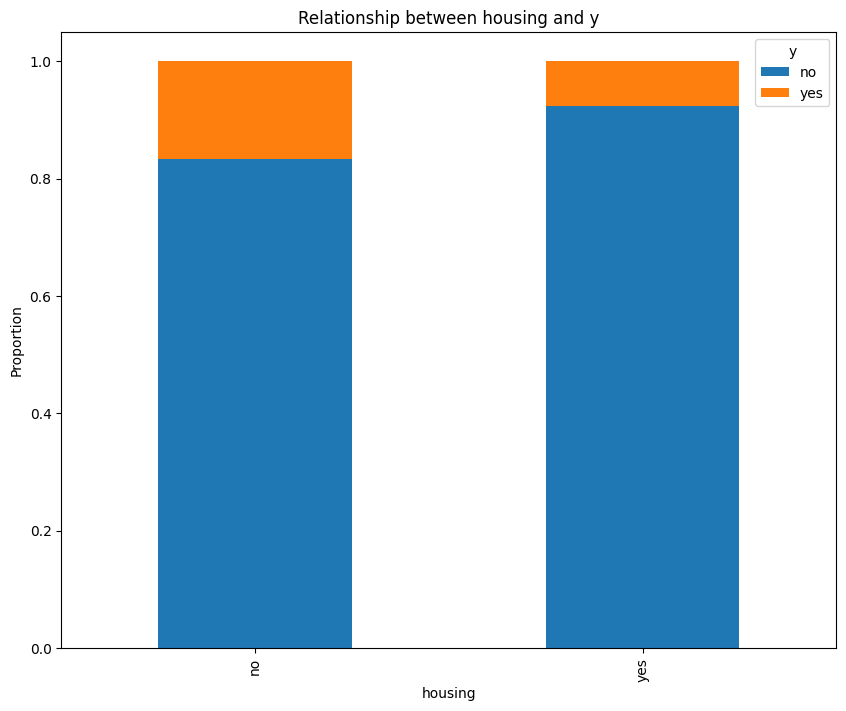

Processing 6/9: loan
Cross-tabulation of 'loan' and 'y':
 y           no       yes
loan                    
no    0.873443  0.126557
yes   0.933186  0.066814


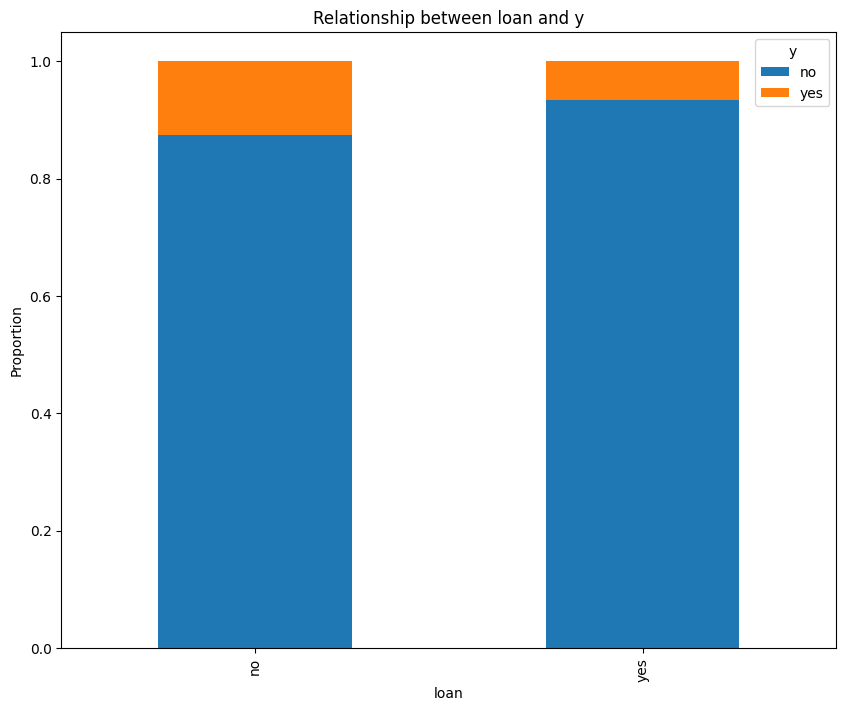

Processing 7/9: contact
Cross-tabulation of 'contact' and 'y':
 y                no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
NaN        0.959293  0.040707


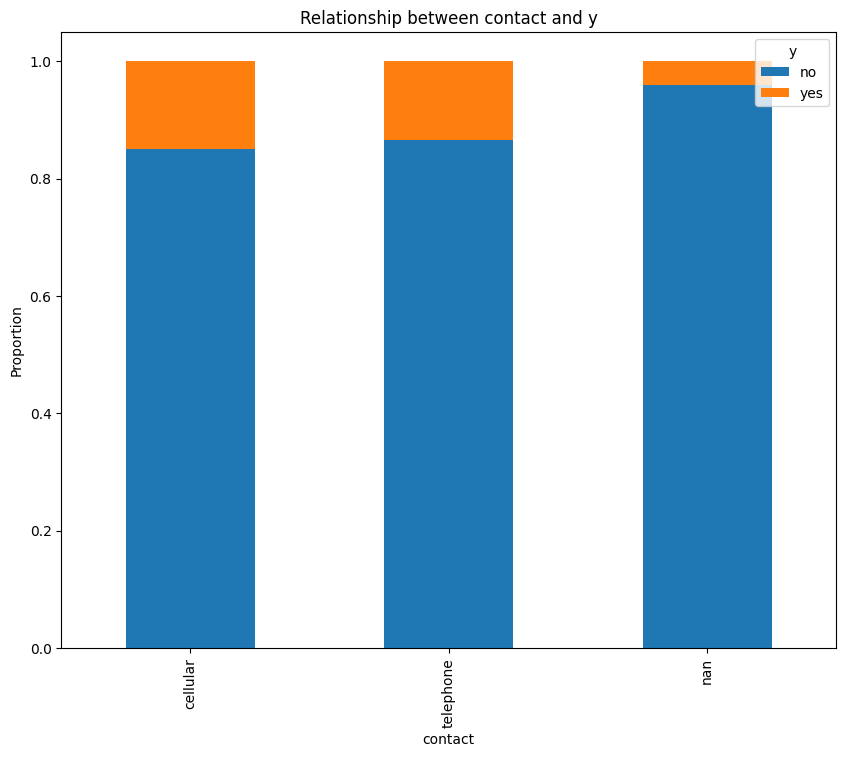

Processing 8/9: month
Cross-tabulation of 'month' and 'y':
 y            no       yes
month                    
apr    0.803206  0.196794
aug    0.889867  0.110133
dec    0.532710  0.467290
feb    0.833522  0.166478
jan    0.898788  0.101212
jul    0.909065  0.090935
jun    0.897772  0.102228
mar    0.480084  0.519916
may    0.932805  0.067195
nov    0.898489  0.101511
oct    0.562331  0.437669
sep    0.535406  0.464594


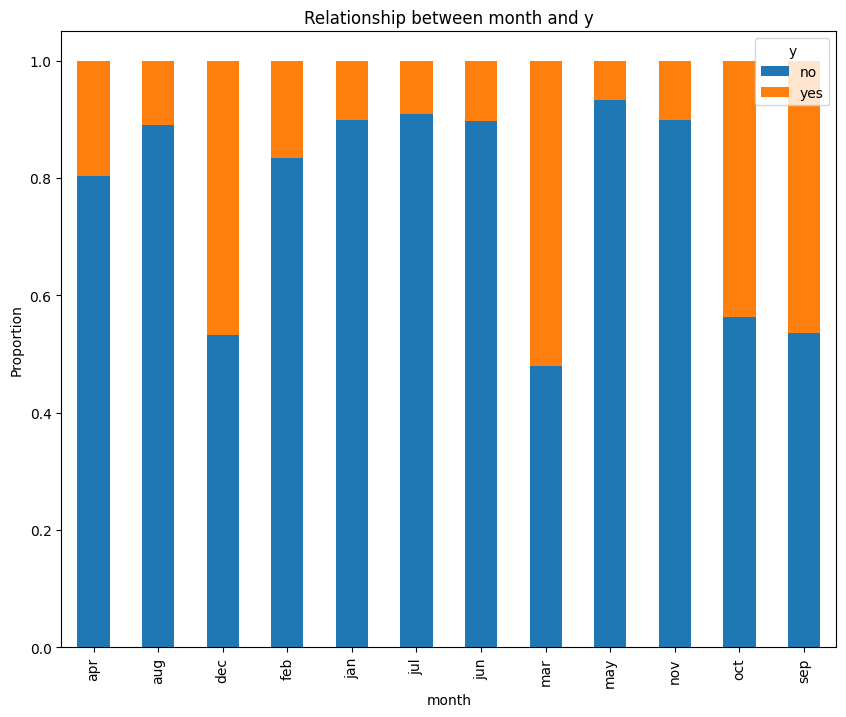

Processing 9/9: poutcome
Cross-tabulation of 'poutcome' and 'y':
 y               no       yes
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253
NaN       0.908385  0.091615


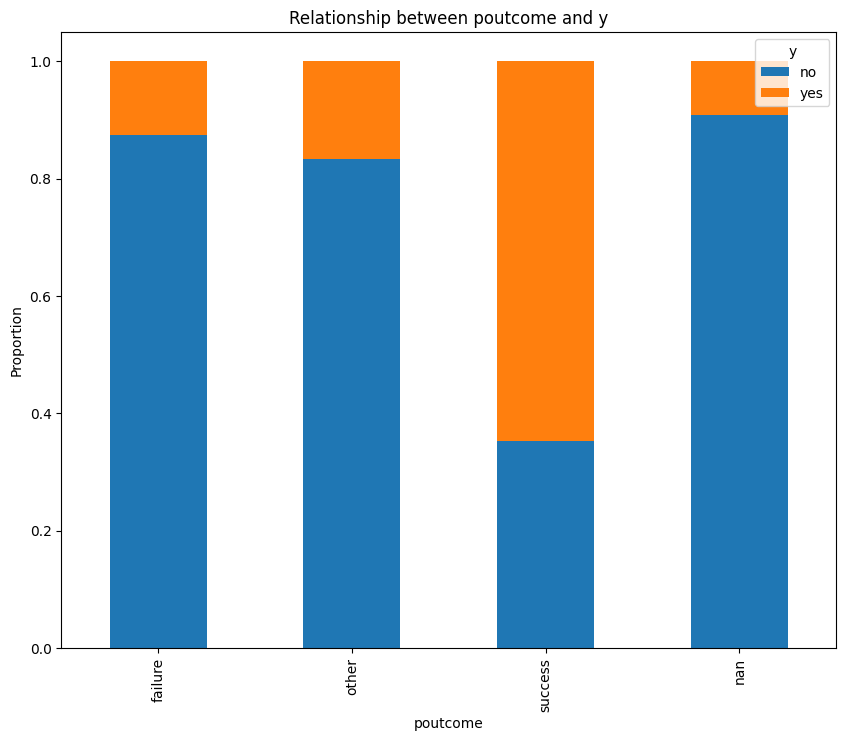

In [14]:


for i, column in enumerate(categorical_columns, start=1):
    print(f"Processing {i}/{len(categorical_columns)}: {column}")
    plot_relation_with_target(df, column, 'y', save_plot=True)


# Numerical Variable Exploration

##1.Numerical Distribution


In [16]:
def plot_numerical_distribution(data, column, bins=30, save_plot=False, output_dir="./plots"):
    """
    Plots the distribution of numerical variables.

    Parameters:
        data: The dataset (DataFrame)
        column: The numerical column (string)
        bins: Number of bins for histogram.
        save_plot: If True, saves the plot to a file.
        output_dir: Directory to save plots if save_plot is True.
    """
    plt.figure(figsize=(20, 10))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, color='purple', bins=bins, alpha=0.6)
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f"Boxplot of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Annotate mean and median
    mean_value = data[column].mean()
    median_value = data[column].median()
    plt.axvline(mean_value, color='red', linestyle='--', label='Mean', linewidth=2)
    plt.axvline(median_value, color='green', linestyle='--', label='Median', linewidth=2)
    plt.legend()

    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(f"{output_dir}/{column}_distribution.png", bbox_inches='tight')

    plt.tight_layout()
    plt.show()


Processing 1/7: age


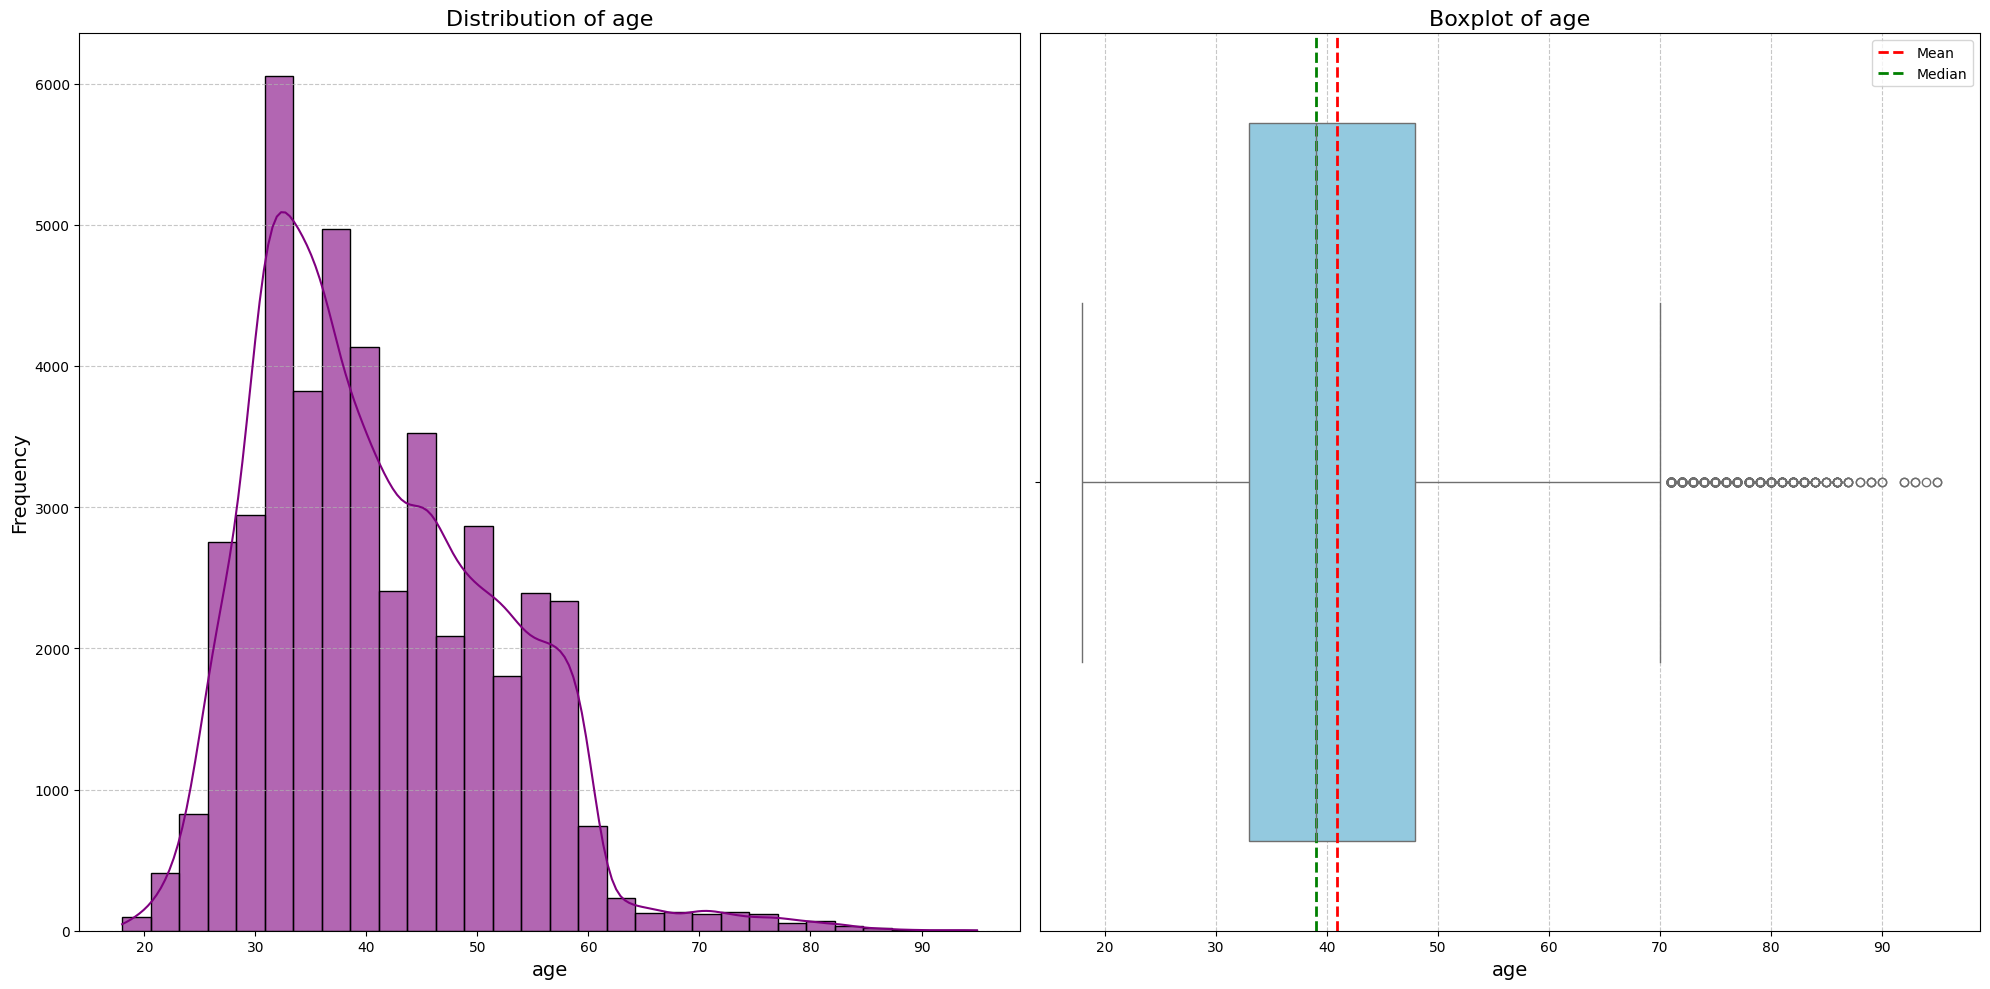

Processing 2/7: balance


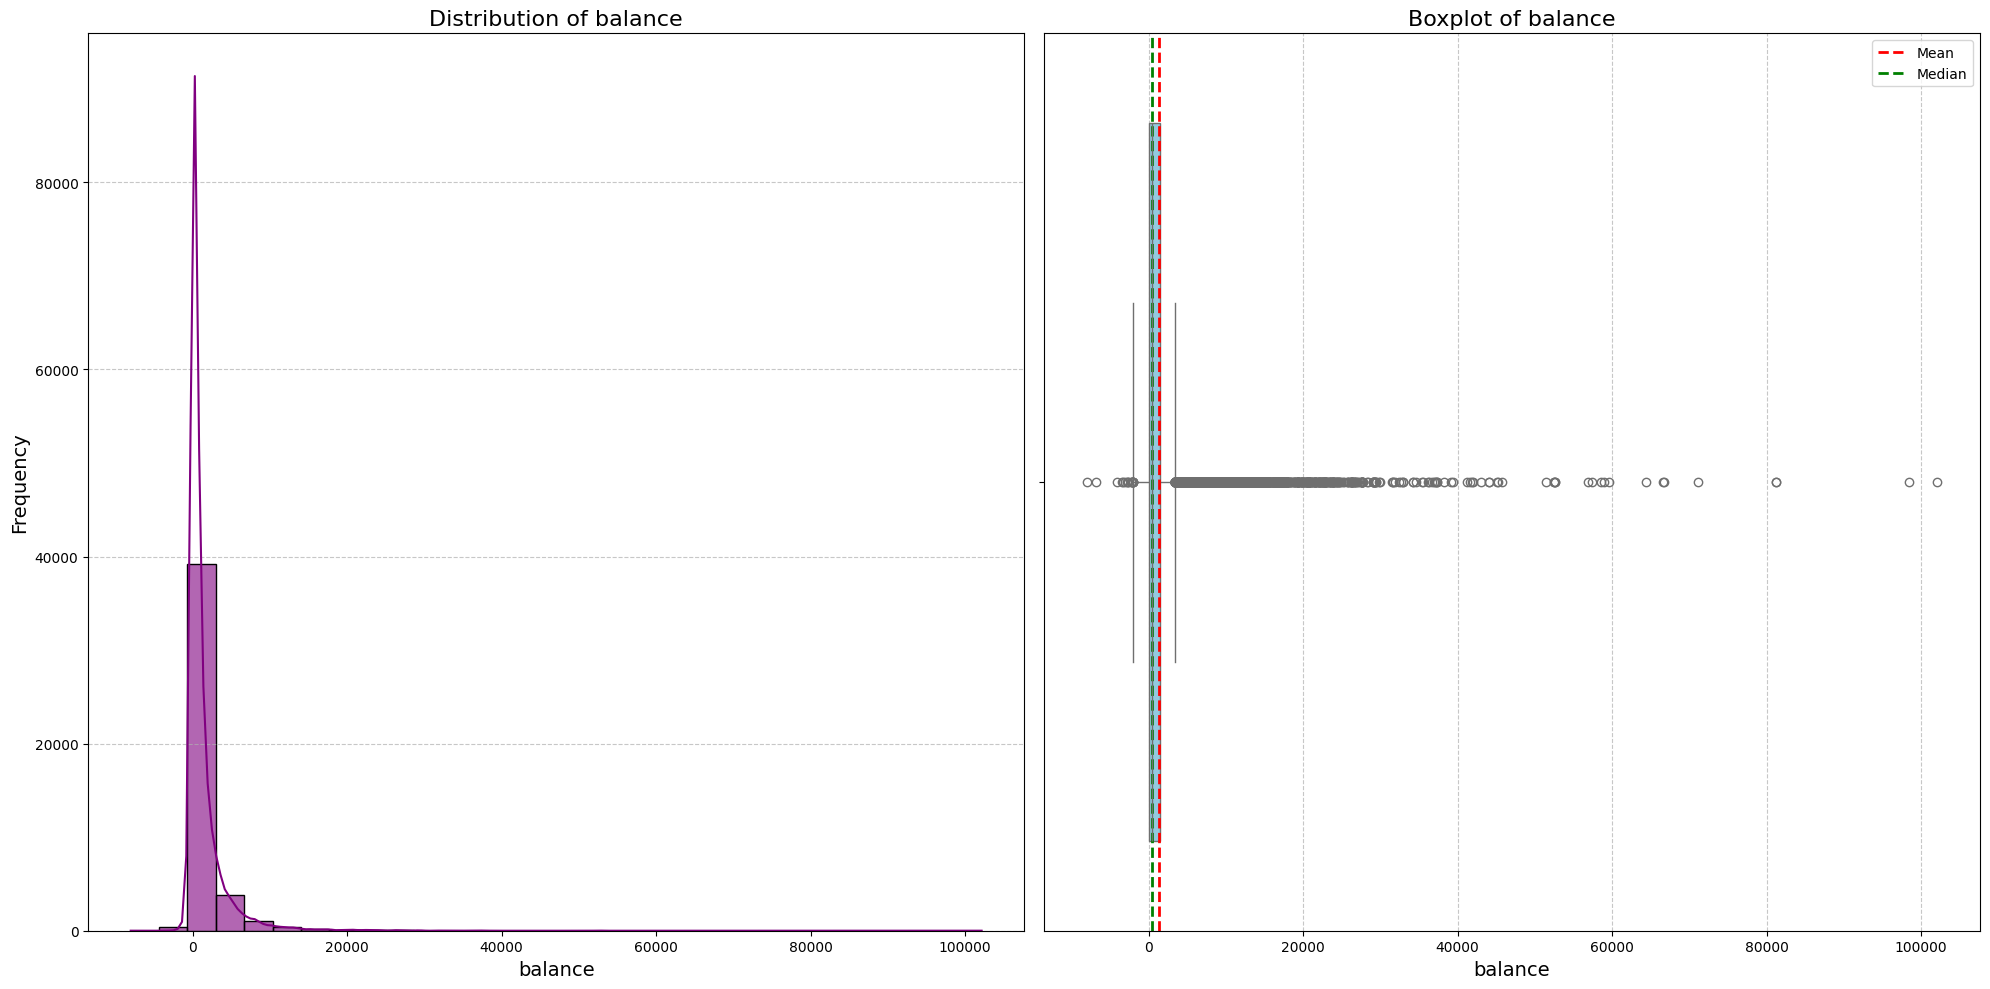

Processing 3/7: day_of_week


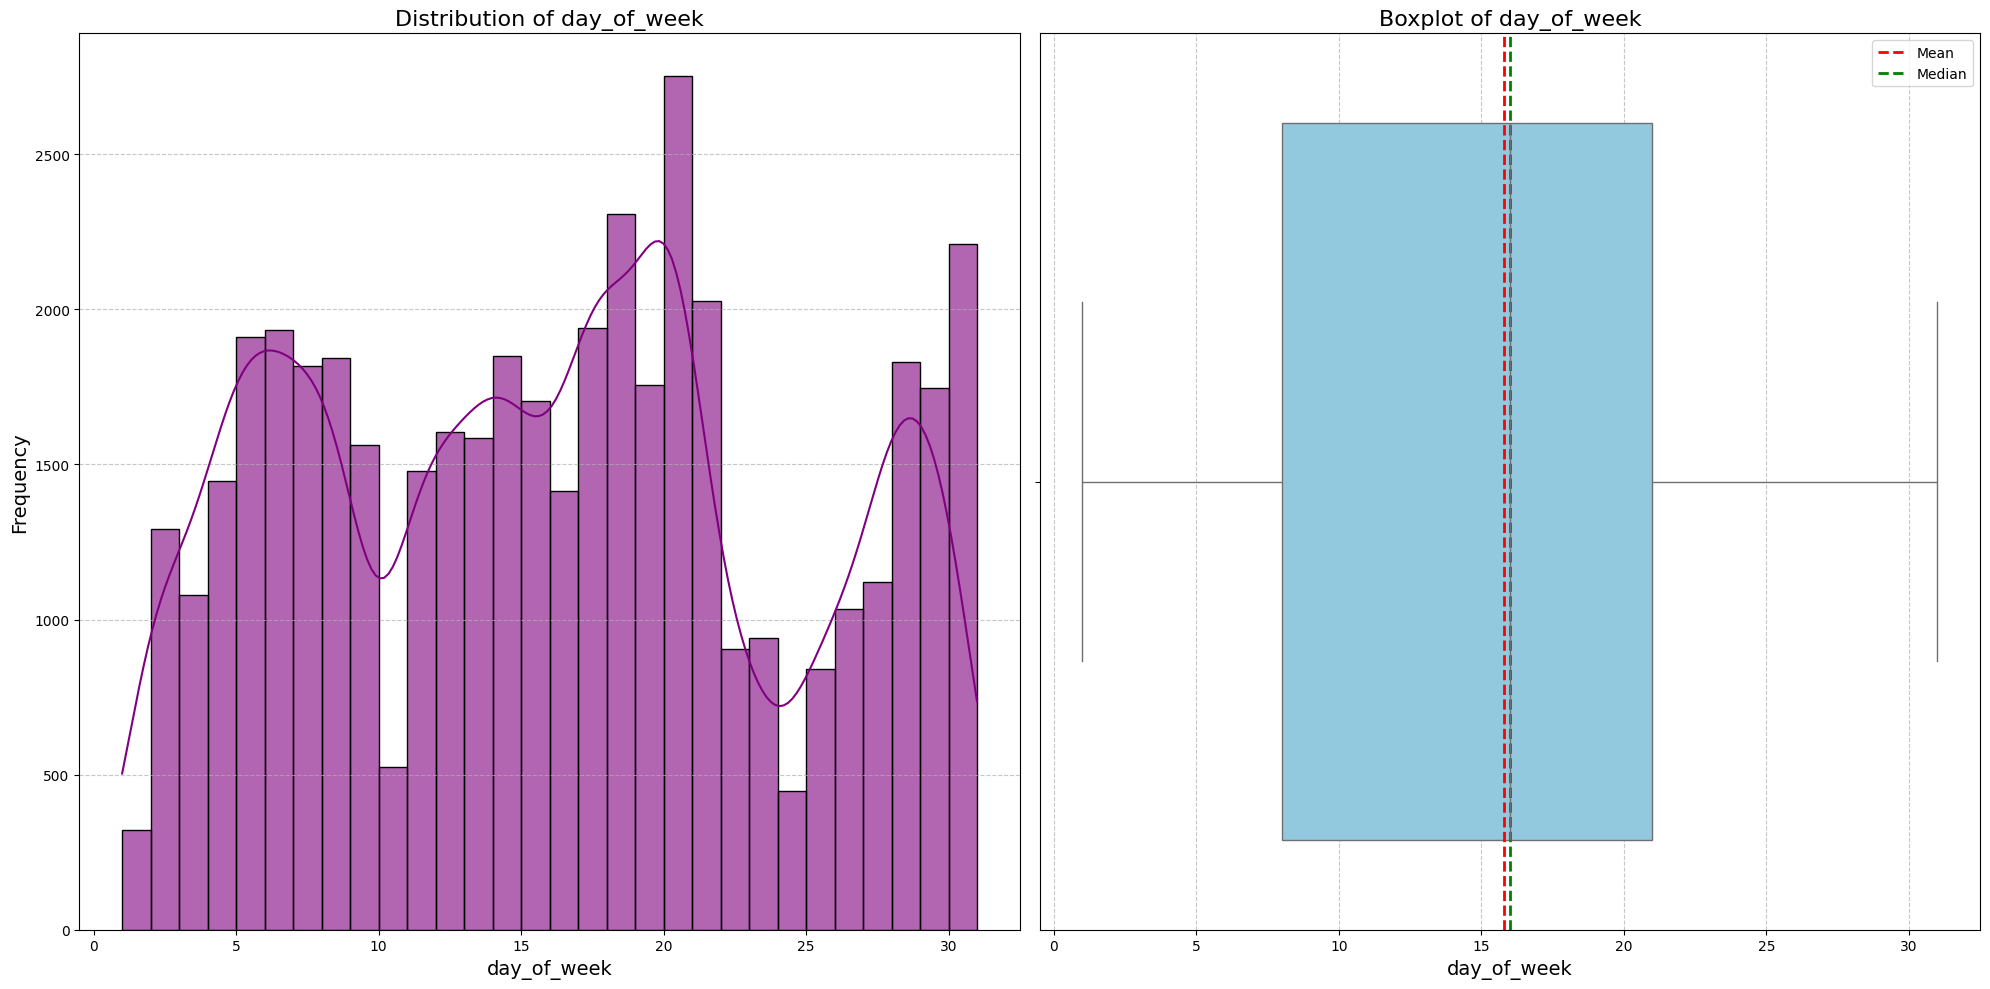

Processing 4/7: duration


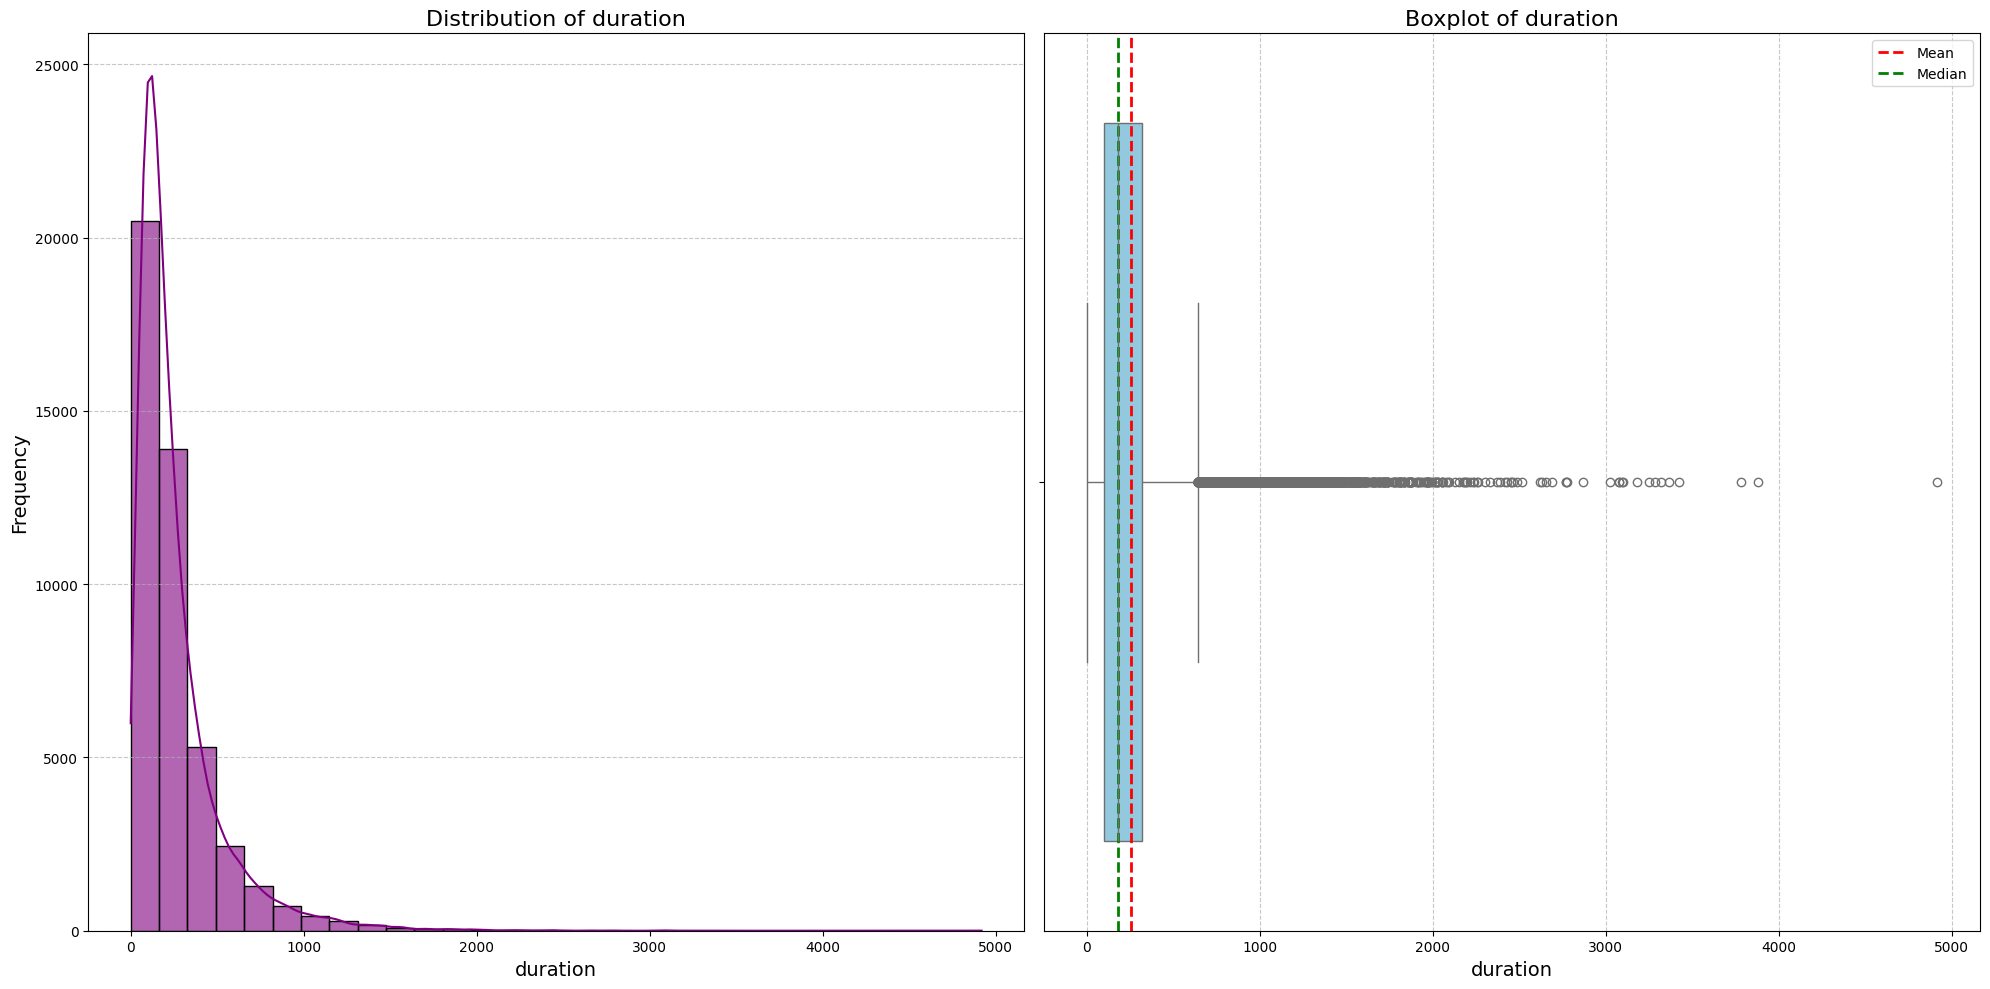

Processing 5/7: campaign


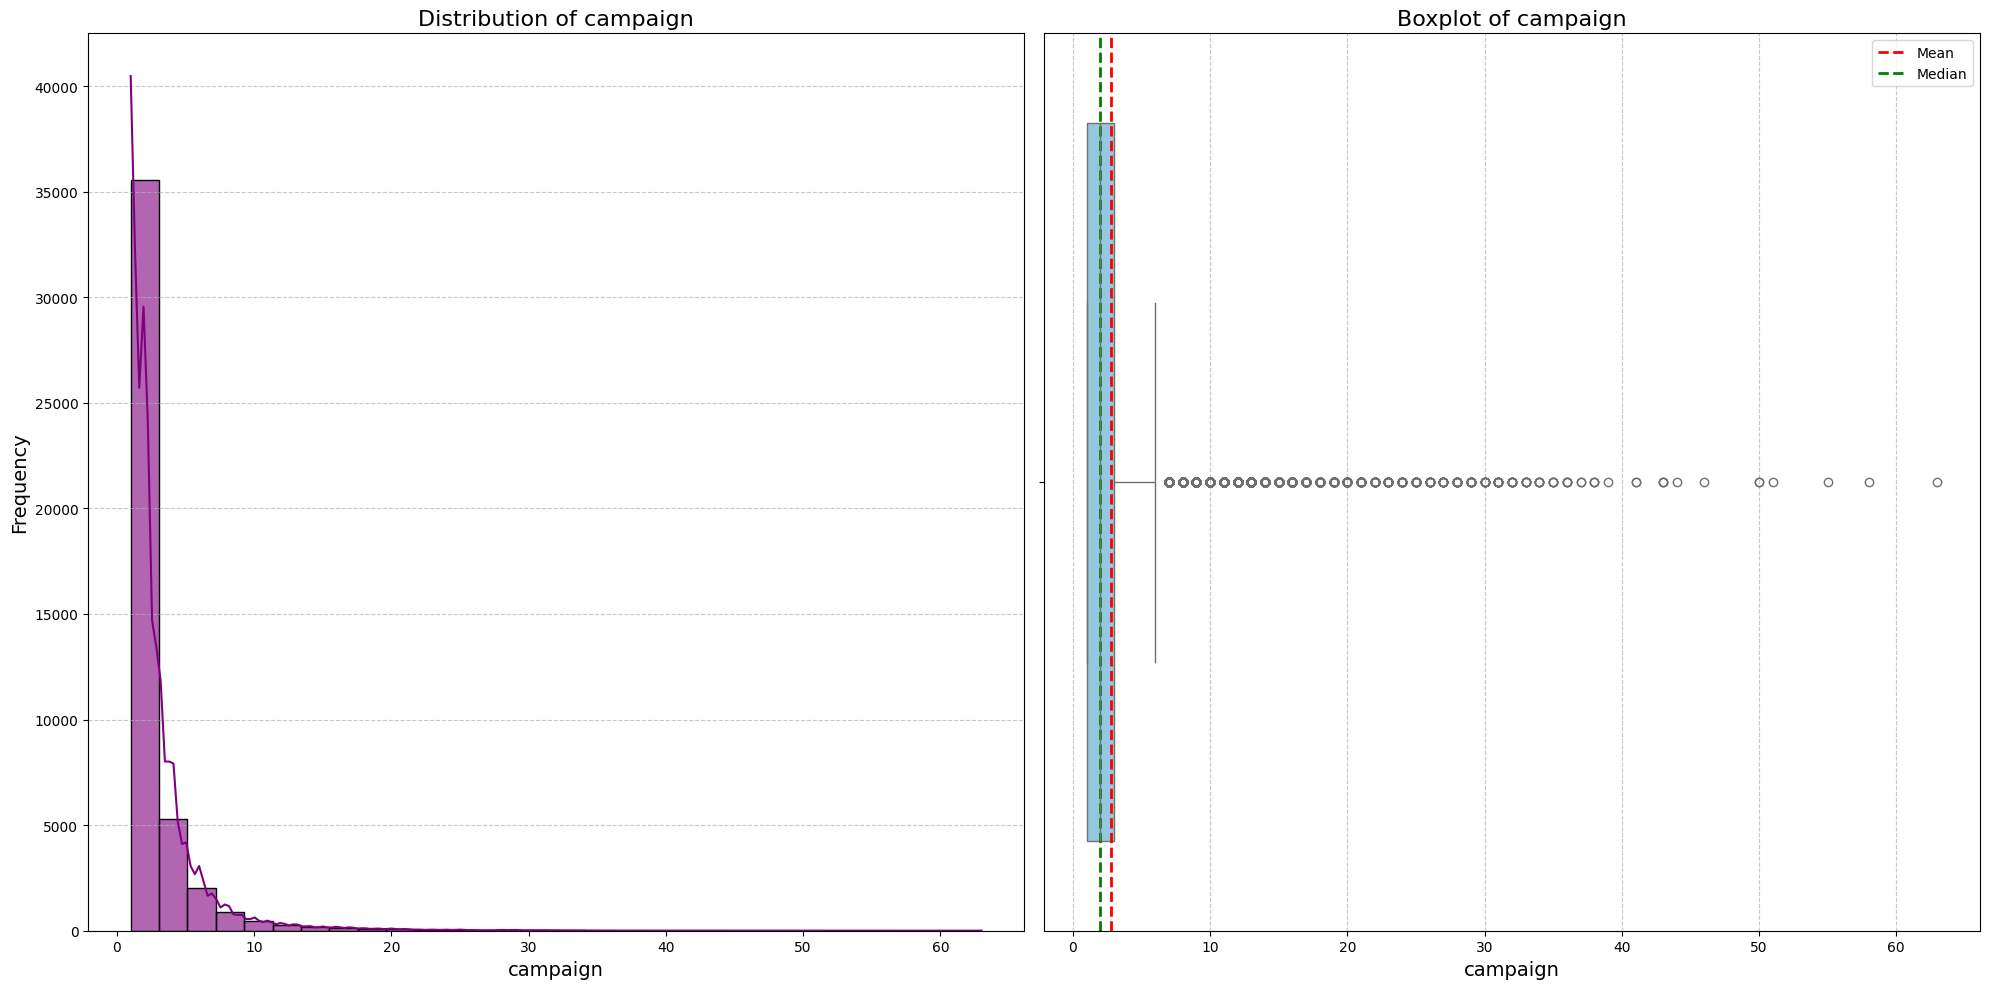

Processing 6/7: pdays


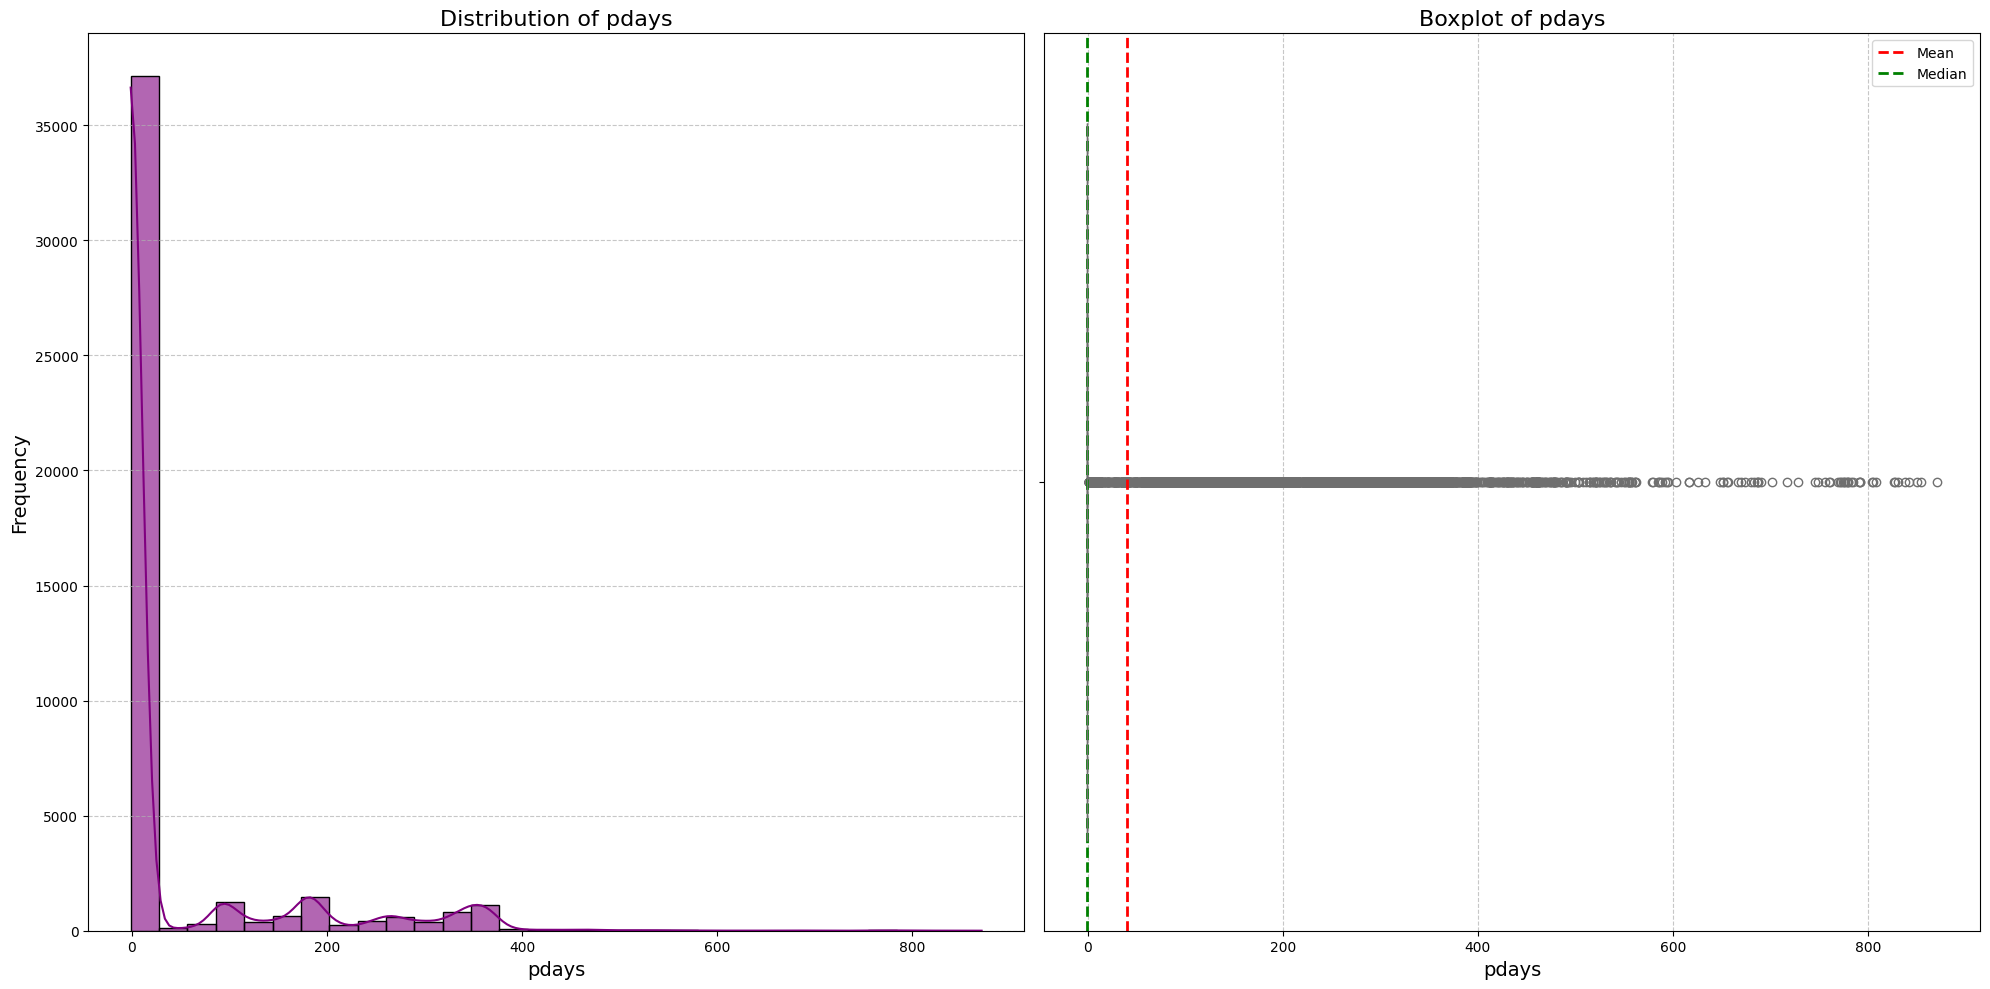

Processing 7/7: previous


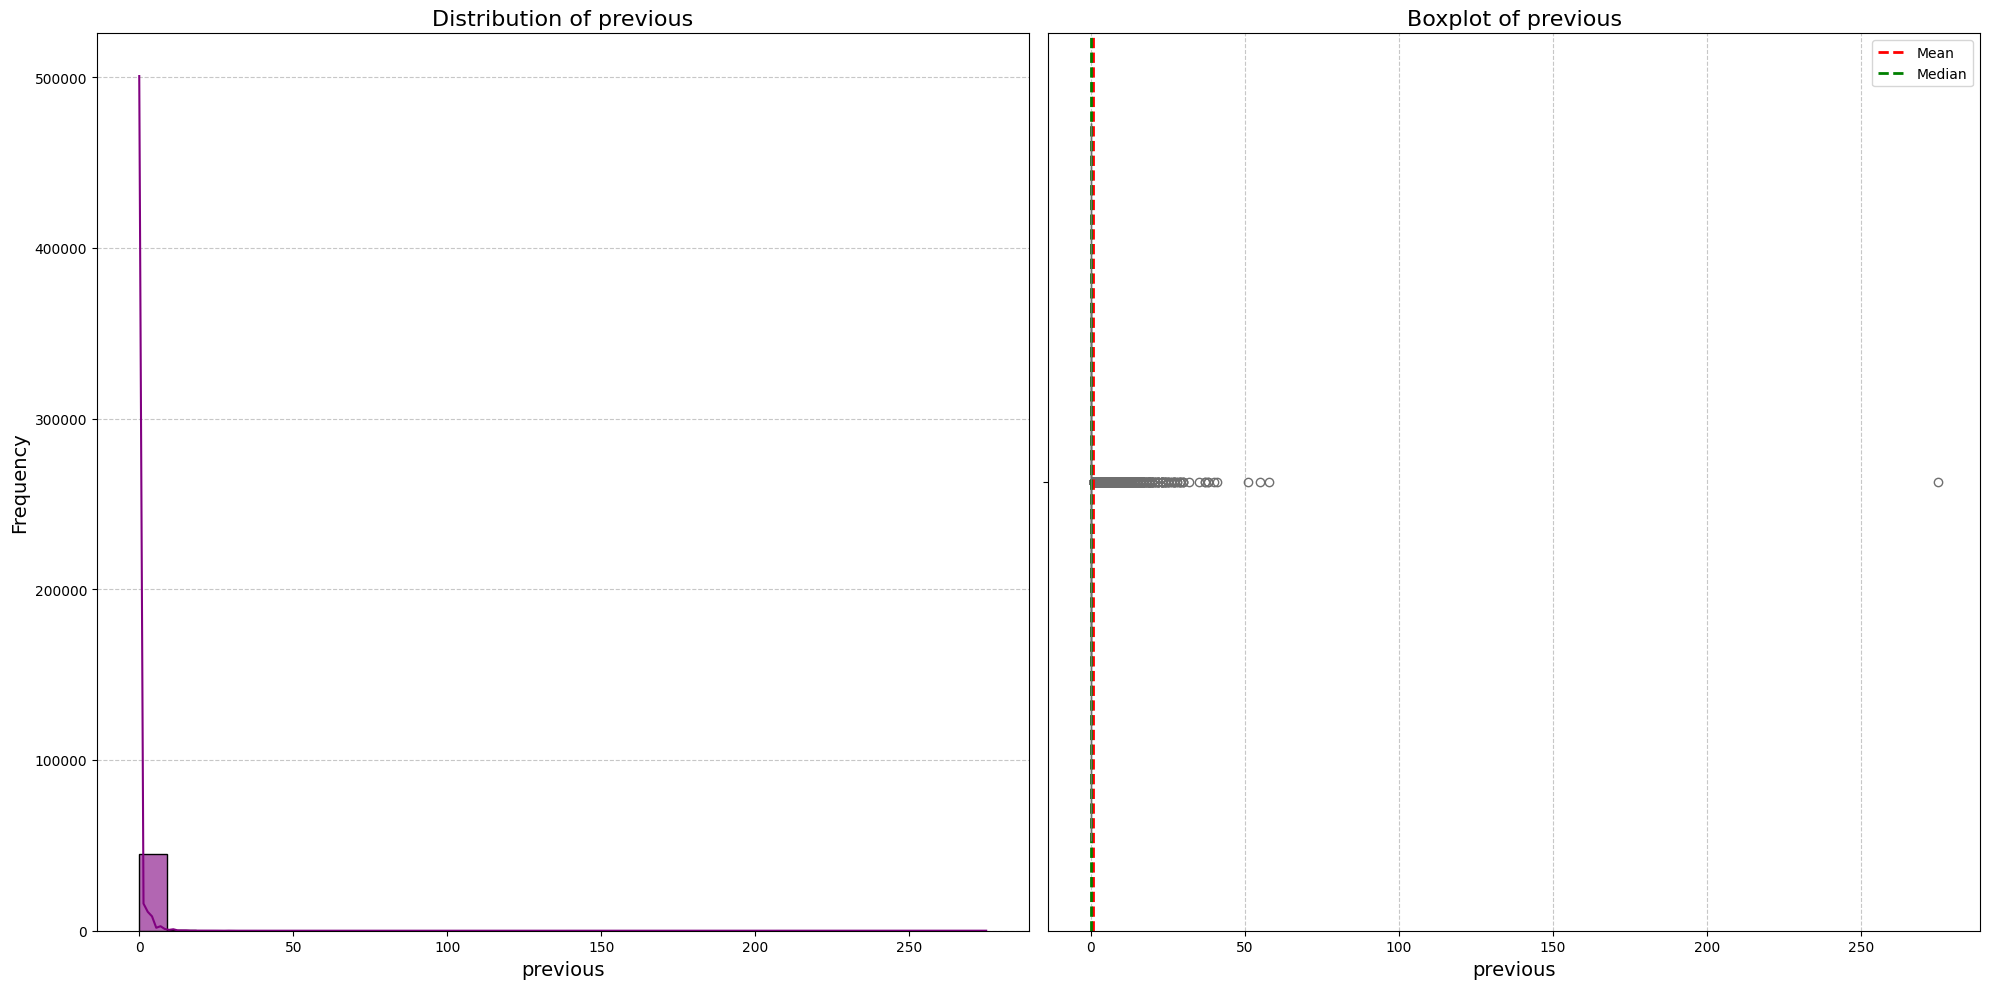

In [17]:
for i, column in enumerate(numerical_columns, start=1):
    print(f"Processing {i}/{len(numerical_columns)}: {column}")
    plot_numerical_distribution(X, column, save_plot=True)


## 2..Relationship with Target variable

In [ ]:
def plot_numerical_relation_with_target(data,column,target):
  """
  Plots the relationship between numerical features and the target variable.

  Parameters:
  data: The dataset (DataFrame)
  column: The numerical column (string)
  target: The target column (string)
  """
  #Checking column availability

  if column not in data.columns or target not in data.columns:
    print(f"Column does not exist in the dataset")

  plt.figure(figsize=(10,8))
  sns.boxplot(data=data, x=target ,y=column,palette="pastel")
  plt.title(f"Relationship between {column} and {target}")
  plt.xlabel(target)
  plt.ylabel(column)
  plt.show()

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


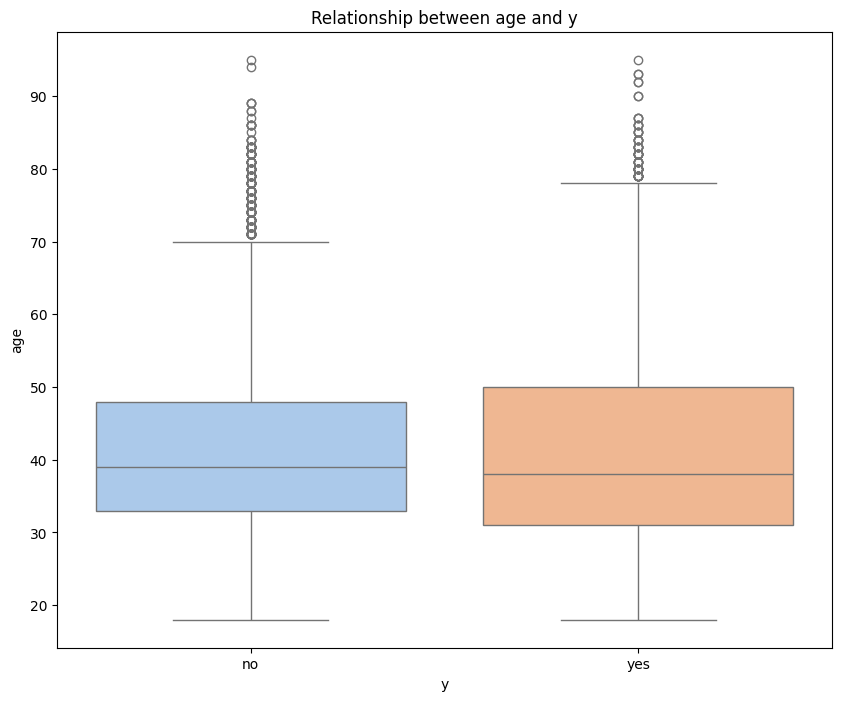

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


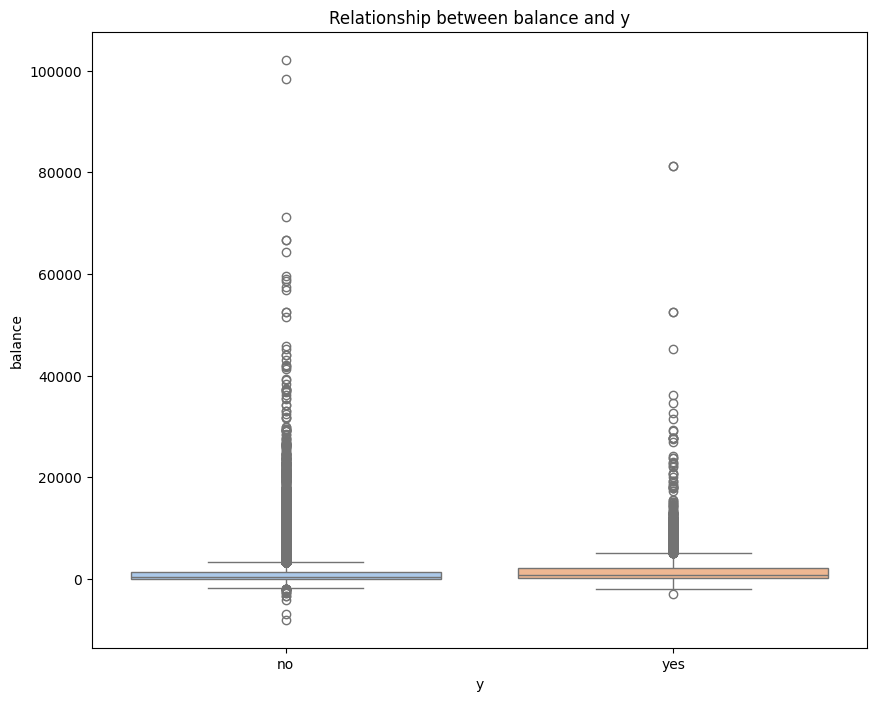

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


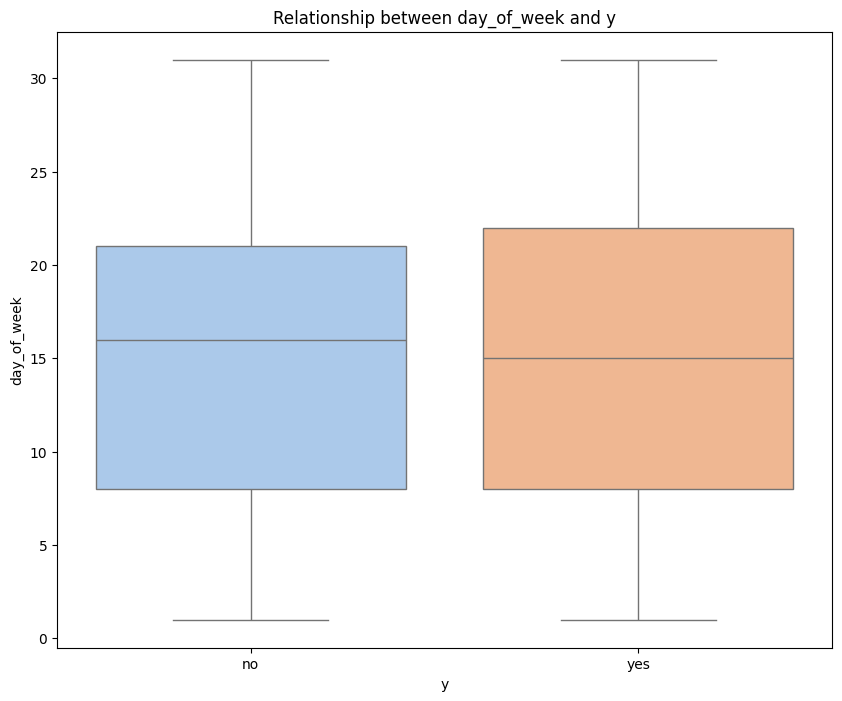

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


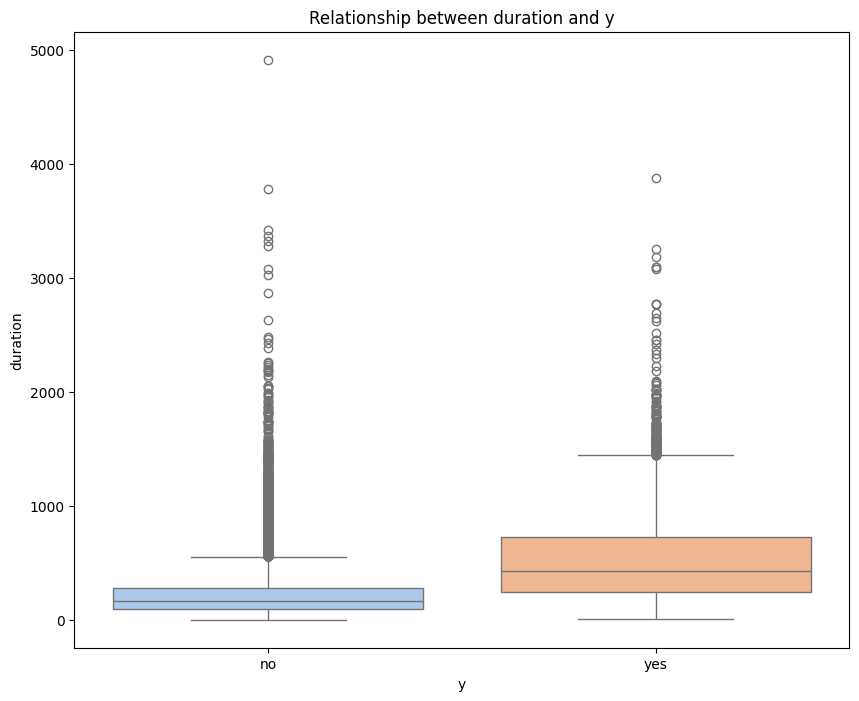

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


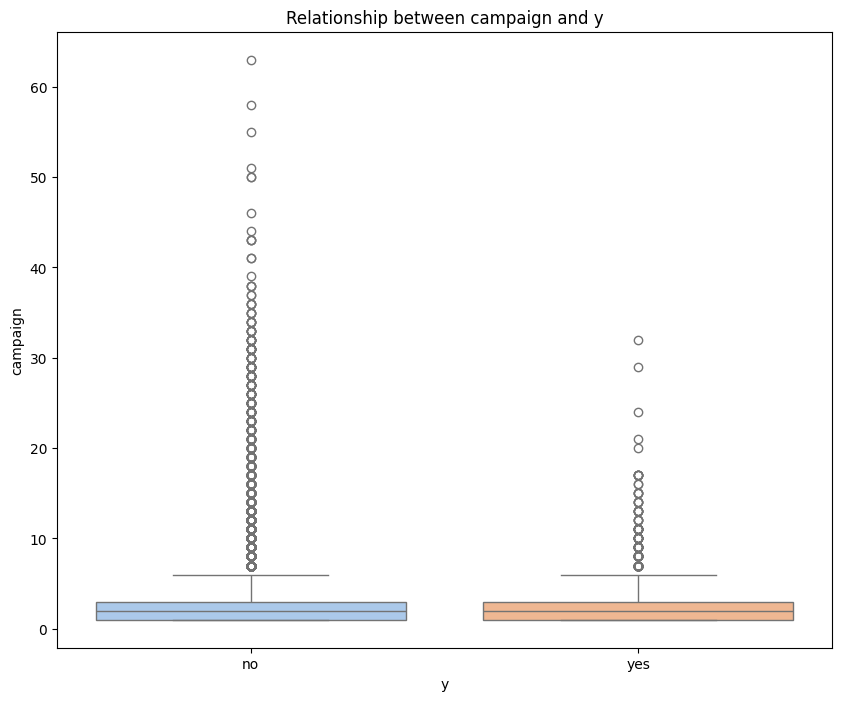

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


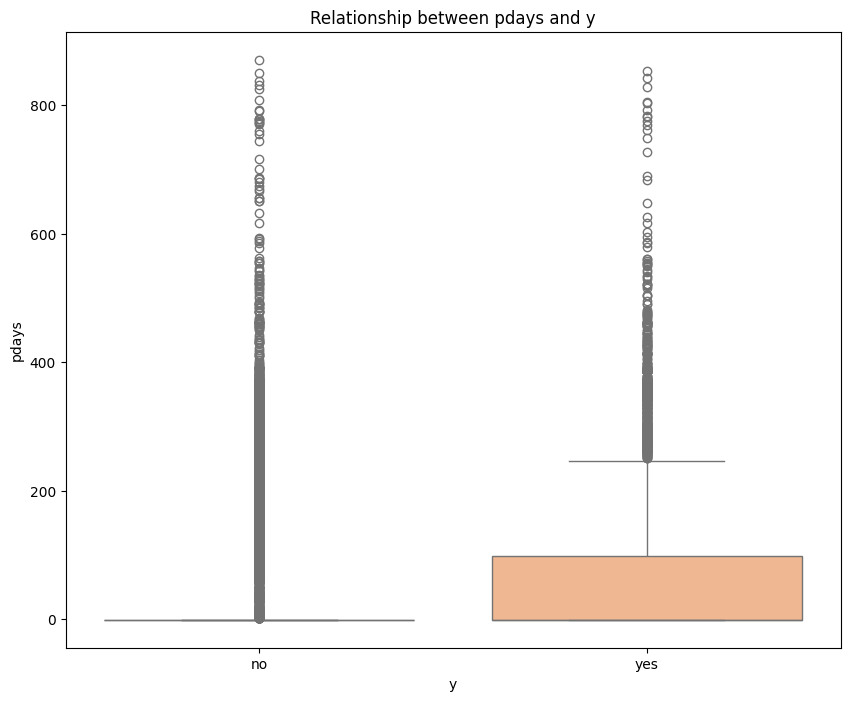

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


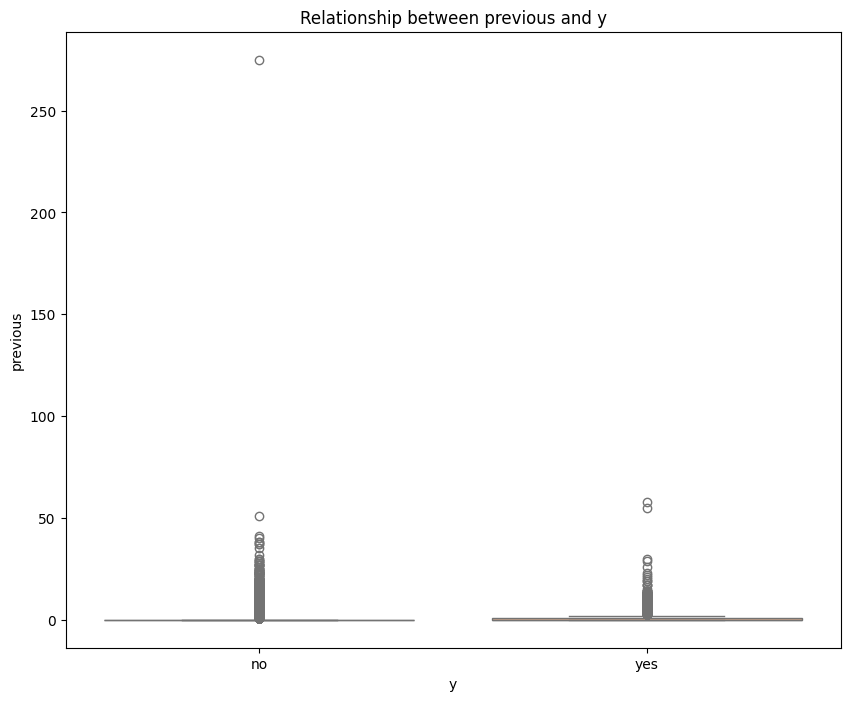

In [ ]:
for column in numerical_columns:
  plot_numerical_relation_with_target(df,column,'y')

##3.Detect outliers

In [ ]:
#IQR method for outliers

def detect_outliers_iqr(data, column):
  """
   To detect iqr outliers

   Parameters

  """
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)

  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
  print(f"Outliers Count: {((data[column] < lower_bound) | (data[column] > upper_bound)).sum()}")

In [ ]:
for column in numerical_columns:
  detect_outliers_iqr(X,column)

age: Lower Bound = 10.5, Upper Bound = 70.5
Outliers Count: 487
balance: Lower Bound = -1962.0, Upper Bound = 3462.0
Outliers Count: 4729
day_of_week: Lower Bound = -11.5, Upper Bound = 40.5
Outliers Count: 0
duration: Lower Bound = -221.0, Upper Bound = 643.0
Outliers Count: 3235
campaign: Lower Bound = -2.0, Upper Bound = 6.0
Outliers Count: 3064
pdays: Lower Bound = -1.0, Upper Bound = -1.0
Outliers Count: 8257
previous: Lower Bound = 0.0, Upper Bound = 0.0
Outliers Count: 8257


#Correlation

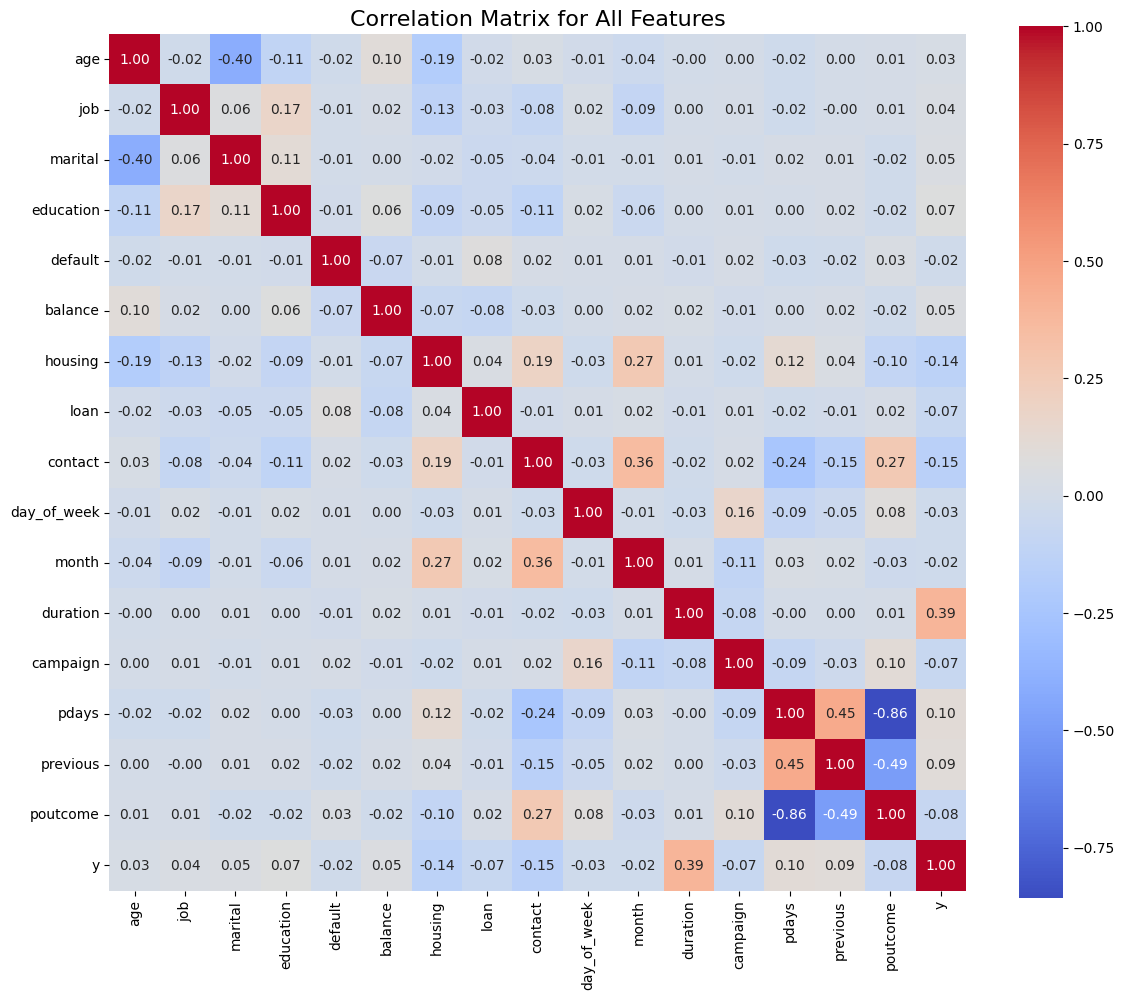

<ipython-input-5-c26bf078ab48>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_correlation.values, y=target_correlation.index, palette="viridis")


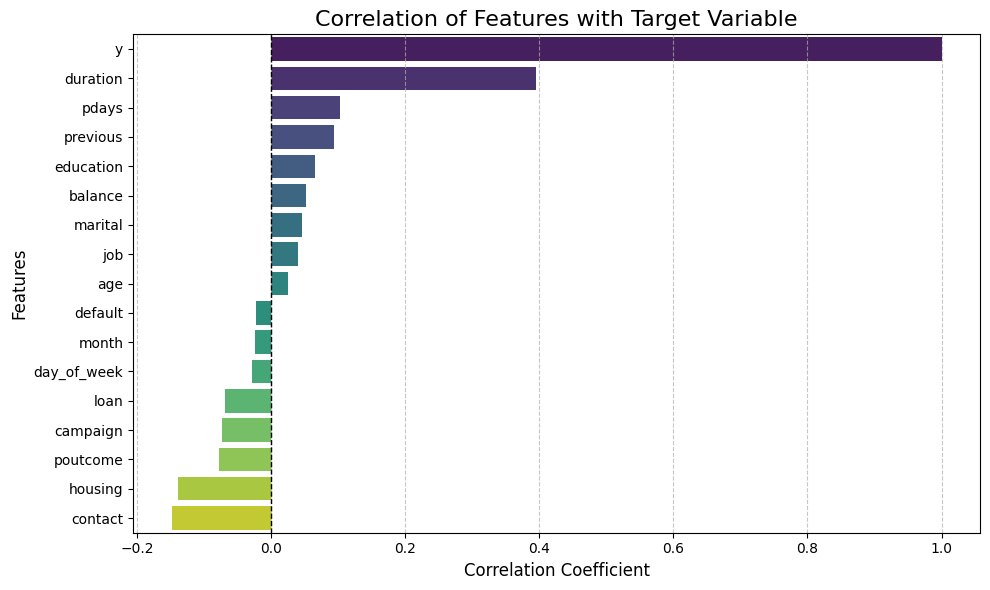

In [5]:
def analyze_feature_correlations(df, target_column):
    """
    Analyzes correlations between features and a target variable in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable.

    Returns:
        pd.Series: Correlation of features with the target variable.
    """
    # Copy the DataFrame to avoid modifying the original
    df_encoded = df.copy()

    # Encode categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Compute correlation matrix
    correlation_matrix = df_encoded.corr()

    # Extract correlation of all features with the target variable
    target_correlation = correlation_matrix[target_column].sort_values(ascending=False)

    # Plot the full correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title("Correlation Matrix for All Features", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Plot correlations of all features with the target
    plt.figure(figsize=(10, 6))
    sns.barplot(x=target_correlation.values, y=target_correlation.index, palette="viridis")
    plt.title("Correlation of Features with Target Variable", fontsize=16)
    plt.xlabel("Correlation Coefficient", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return target_correlation
analyze_feature_correlations(df, 'y')